In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import t
from scipy.integrate import simps
import pymc3 as pm
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

# Bayesian inference on the spin-magnetic angle alpha & opening angle delta
# using Hui+2017

In [25]:
modelHui = pm.Model()
N_RQ=35
N_tot=77
with modelHui:

    # Priors for unknown model parameters
    alpha = pm.Uniform('alpha',lower=0.,upper=90.)
    delta = pm.Uniform('delta',lower=0.,upper=90.)
    
    F_RQ_1 = np.cos((alpha+delta)*np.pi/180.)
    F_RQ_2 = 2*np.sin(alpha*np.pi/180.)*np.sin(delta*np.pi/180.)
    F_RQ_3 = 1.-np.cos((alpha-delta)*np.pi/180.)

    # Likelihood (sampling distribution) of observations
    Like = pm.Binomial('binomialLikelihood', n=N_tot, p=pm.math.switch(alpha+delta>90., F_RQ_3, pm.math.switch(alpha-delta<0., F_RQ_1, F_RQ_2)), observed=N_RQ)

In [55]:
with modelHui:
    traceHui = pm.sample(25000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 26913/27000 [00:56<00:00, 476.79it/s]/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.609392709837, but should be close to 0.8. Try to increase the number of tuning steps.
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 527 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
100%|██████████| 27000/27000 [00:56<00:00, 477.48it/s]
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 1 contains 32 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x120802850>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1211a00d0>], dtype=object)

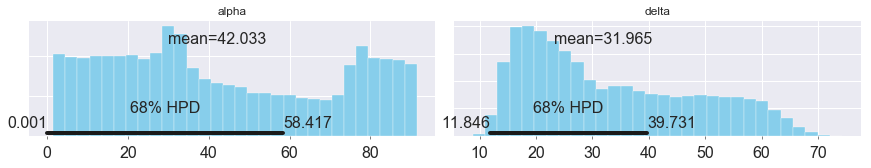

In [56]:
pm.plot_posterior(traceHui, alpha_level=0.32, varnames=['alpha','delta'], color='#87ceeb')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1228e9290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12303c690>]], dtype=object)

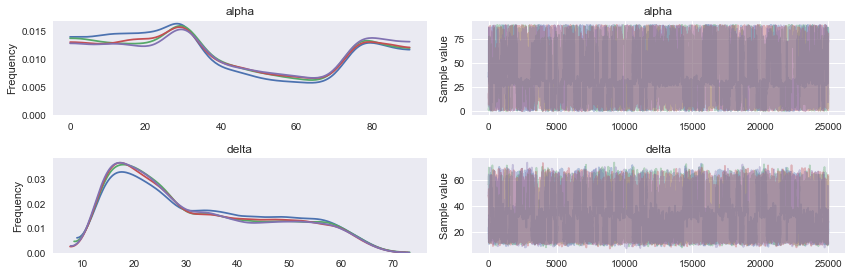

In [57]:
pm.traceplot(traceHui, varnames=['alpha','delta'])

(0.0, 90.0)

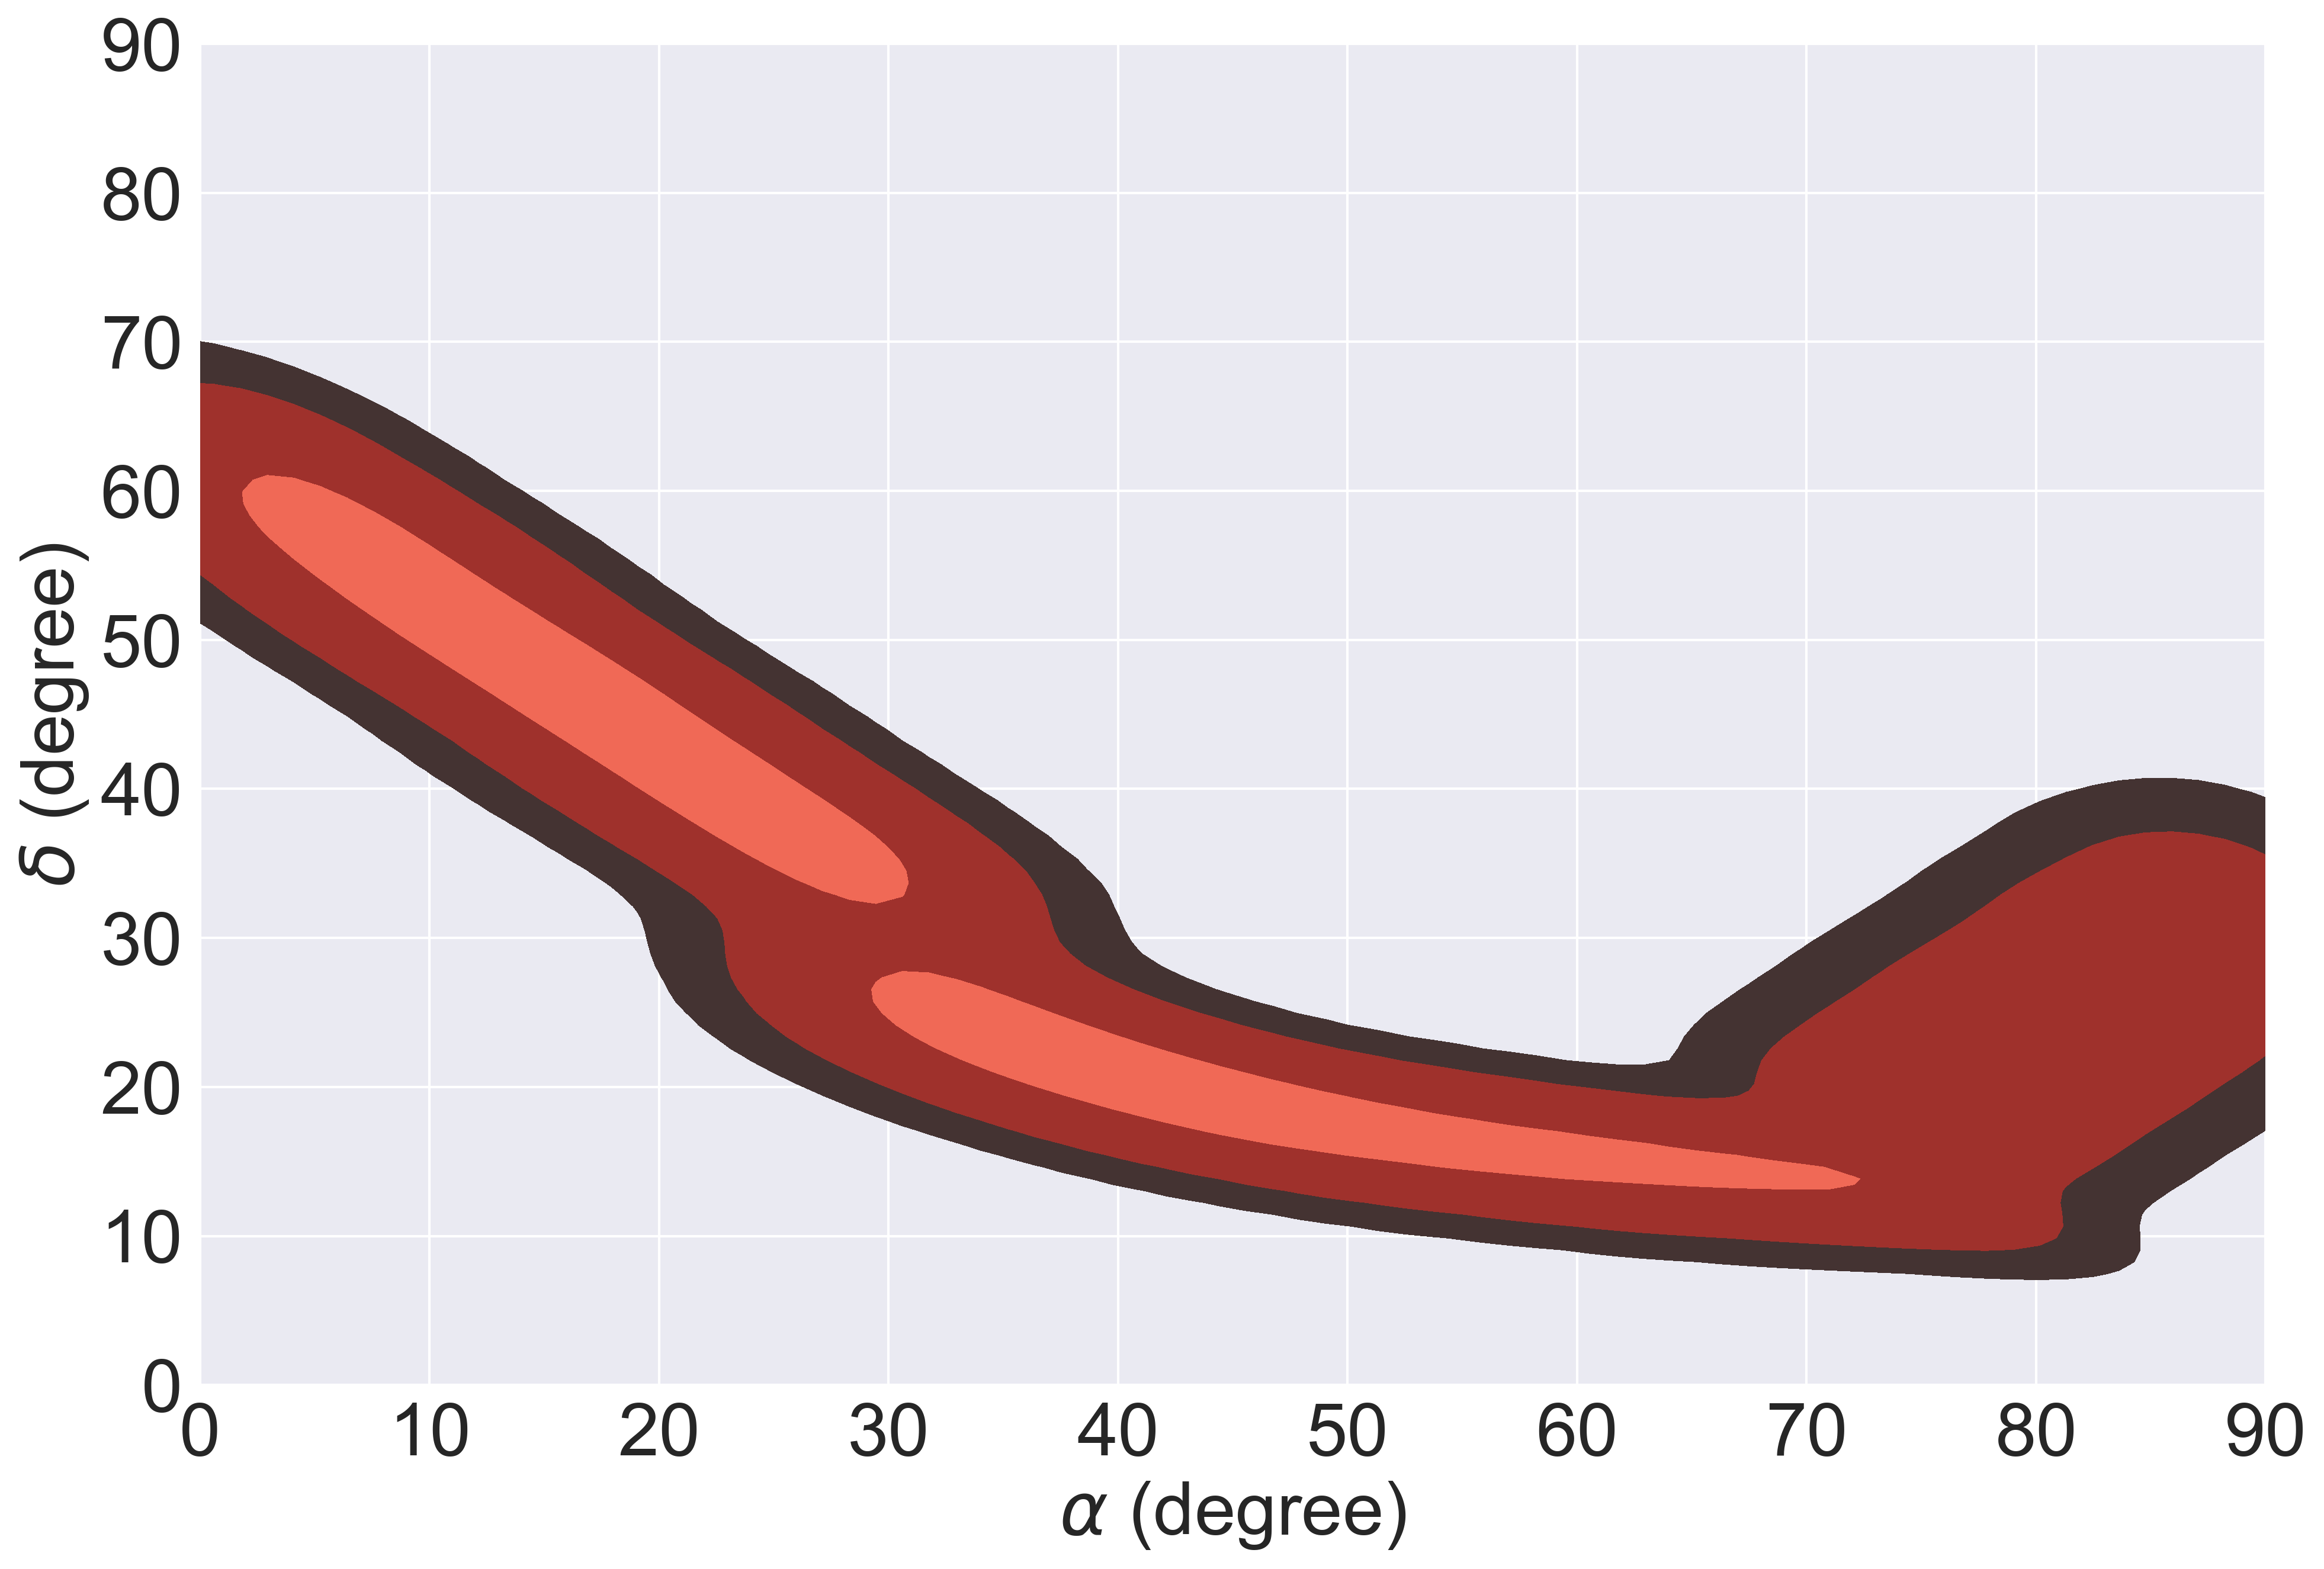

In [59]:
# Make a 2d normed histogram
H,xedges,yedges=np.histogram2d(traceHui['alpha'][:],traceHui['delta'][:],bins=40,normed=True)

norm=H.sum() # Find the norm of the sum
# Set contour levels
contour1=0.99
contour2=0.95
contour3=0.68

# Set target levels as percentage of norm
target1 = norm*contour1
target2 = norm*contour2
target3 = norm*contour3

# Take histogram bin membership as proportional to Likelihood
# This is true when data comes from a Markovian process
def objective(limit, target):
    w = np.where(H>limit)
    count = H[w]
    return count.sum() - target

# Find levels by summing histogram to objective
level1= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target1,))
level2= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target2,))
level3= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target3,))

# For nice contour shading with seaborn, define top level
level4=H.max()
levels=[level1,level2,level3,level4]

# Pass levels to normed kde plot
fig, ax = plt.subplots(figsize=(15, 10), dpi=300)
sns.kdeplot(traceHui['alpha'][:],traceHui['delta'][:], shade=True, ax=ax, n_levels=levels ,cmap="Reds_d", normed=True)
plt.xlabel(r"$\alpha$ (degree)",size=30)
plt.ylabel(r"$\delta$ (degree)",size=30)
plt.tick_params(labelsize=30)
plt.xlim(0.,90.)
plt.ylim(0.,90.)

# using Sokolova+2016

In [3]:
modelSok = pm.Model()
N_RQ=25
N_tot=40
with modelSok:

    # Priors for unknown model parameters
    alpha = pm.Uniform('alpha',lower=0.,upper=90.)
    delta = pm.Uniform('delta',lower=0.,upper=90.)
    
    F_RQ_1 = np.cos((alpha+delta)*np.pi/180.)
    F_RQ_2 = 2*np.sin(alpha*np.pi/180.)*np.sin(delta*np.pi/180.)
    F_RQ_3 = 1.-np.cos((alpha-delta)*np.pi/180.)

    # Likelihood (sampling distribution) of observations
    Like = pm.Binomial('binomialLikelihood', n=N_tot, p=pm.math.switch(alpha+delta>90., F_RQ_3, pm.math.switch(alpha-delta<0., F_RQ_1, F_RQ_2)), observed=N_RQ)

In [42]:
with modelSok:
    traceSok = pm.sample(25000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 27000/27000 [10:06<00:00, 44.53it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ab8c750>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1194ac4d0>], dtype=object)

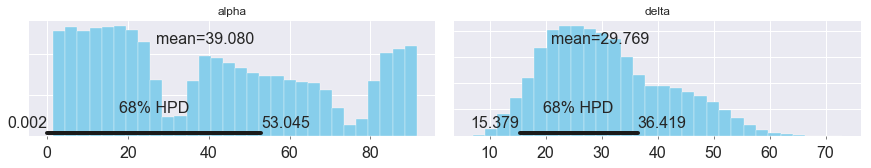

In [43]:
pm.plot_posterior(traceSok, alpha_level=0.32, varnames=['alpha','delta'], color='#87ceeb')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11eaeb6d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f54ea50>]], dtype=object)

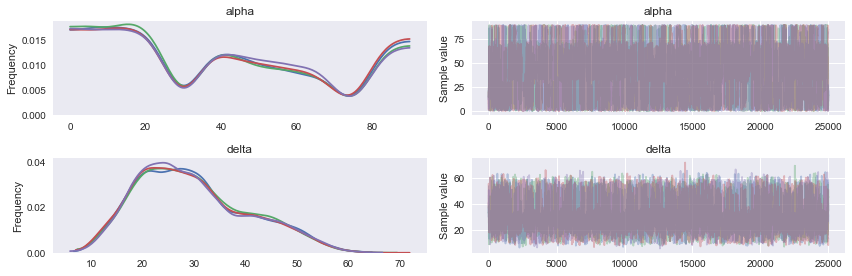

In [44]:
pm.traceplot(traceSok, varnames=['alpha','delta'])

(0.0, 90.0)

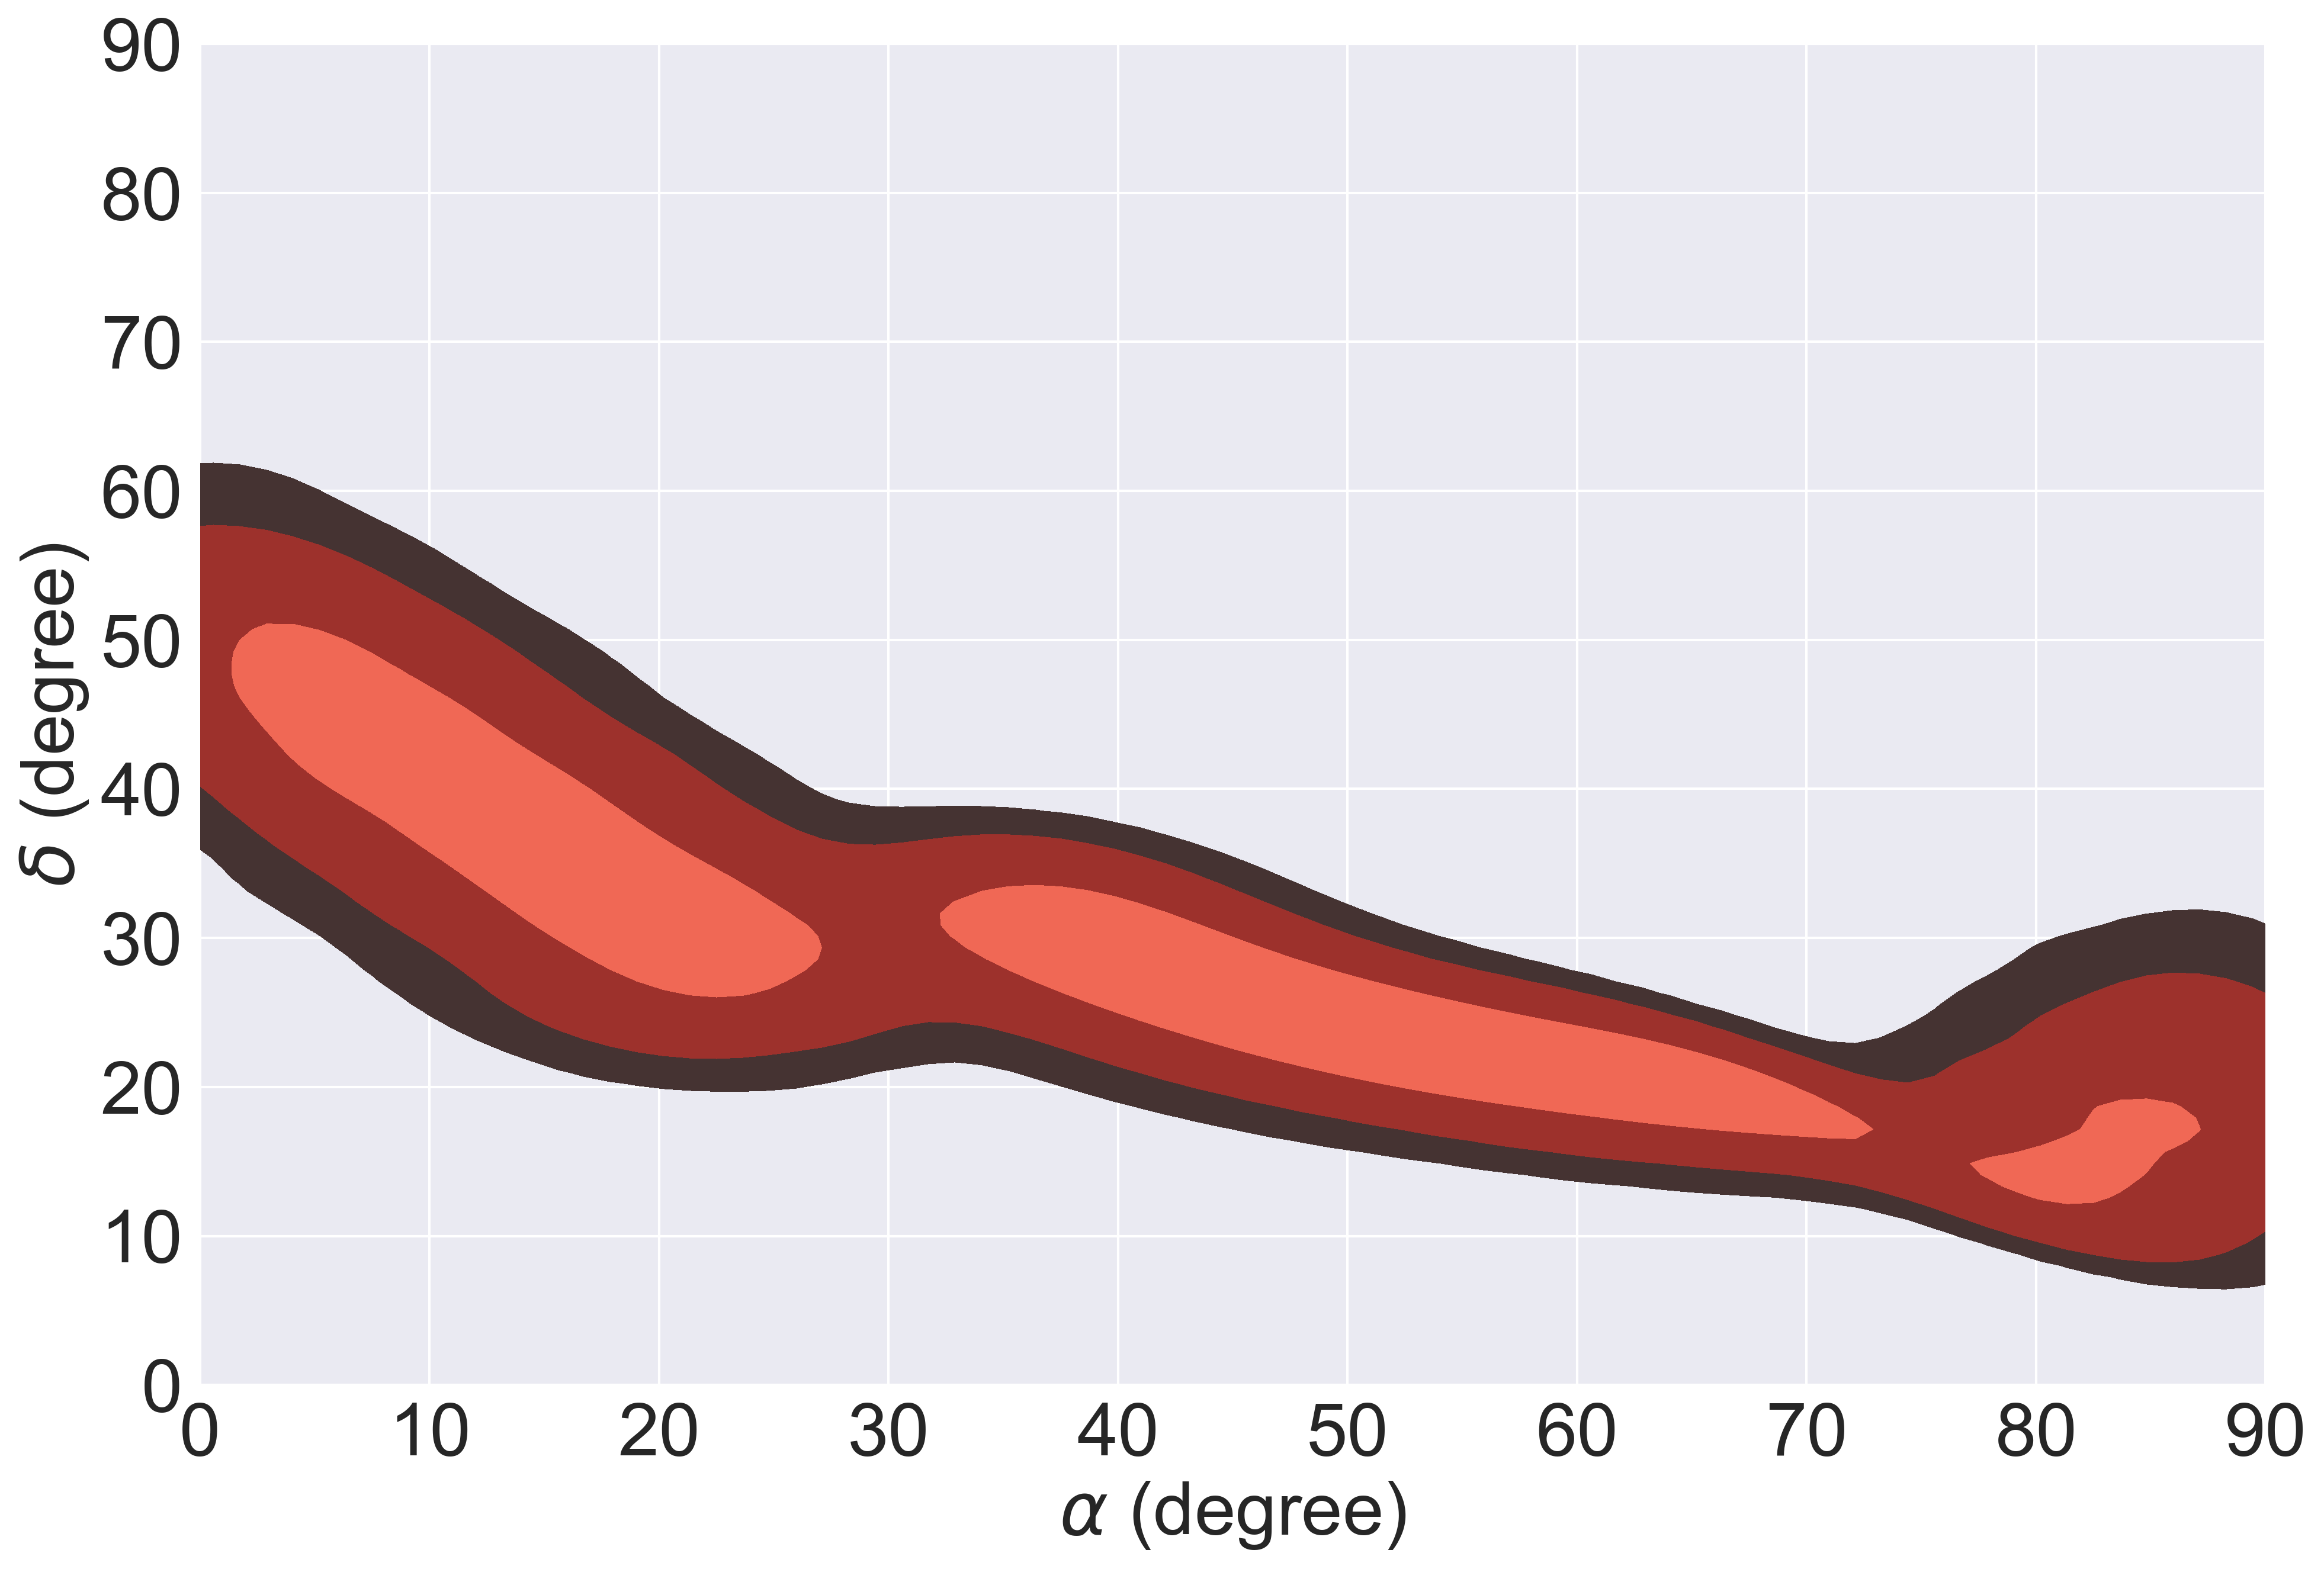

In [60]:
# Make a 2d normed histogram
H,xedges,yedges=np.histogram2d(traceSok['alpha'][:],traceSok['delta'][:],bins=40,normed=True)

norm=H.sum() # Find the norm of the sum
# Set contour levels
contour1=0.99
contour2=0.95
contour3=0.68

# Set target levels as percentage of norm
target1 = norm*contour1
target2 = norm*contour2
target3 = norm*contour3

# Take histogram bin membership as proportional to Likelihood
# This is true when data comes from a Markovian process
def objective(limit, target):
    w = np.where(H>limit)
    count = H[w]
    return count.sum() - target

# Find levels by summing histogram to objective
level1= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target1,))
level2= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target2,))
level3= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target3,))

# For nice contour shading with seaborn, define top level
level4=H.max()
levels=[level1,level2,level3,level4]

# Pass levels to normed kde plot
fig, ax = plt.subplots(figsize=(15, 10), dpi=300)
sns.kdeplot(traceSok['alpha'][:],traceSok['delta'][:], shade=True, ax=ax, n_levels=levels ,cmap="Reds_d", normed=True)
plt.xlabel(r"$\alpha$ (degree)",size=30)
plt.ylabel(r"$\delta$ (degree)",size=30)
plt.tick_params(labelsize=30)
plt.xlim()
plt.xlim(0.,90.)
plt.ylim(0.,90.)

# analytical solution for alpha-delta relationship for values of F_RL = 1 - F_RQ

(0.0, 90.0)

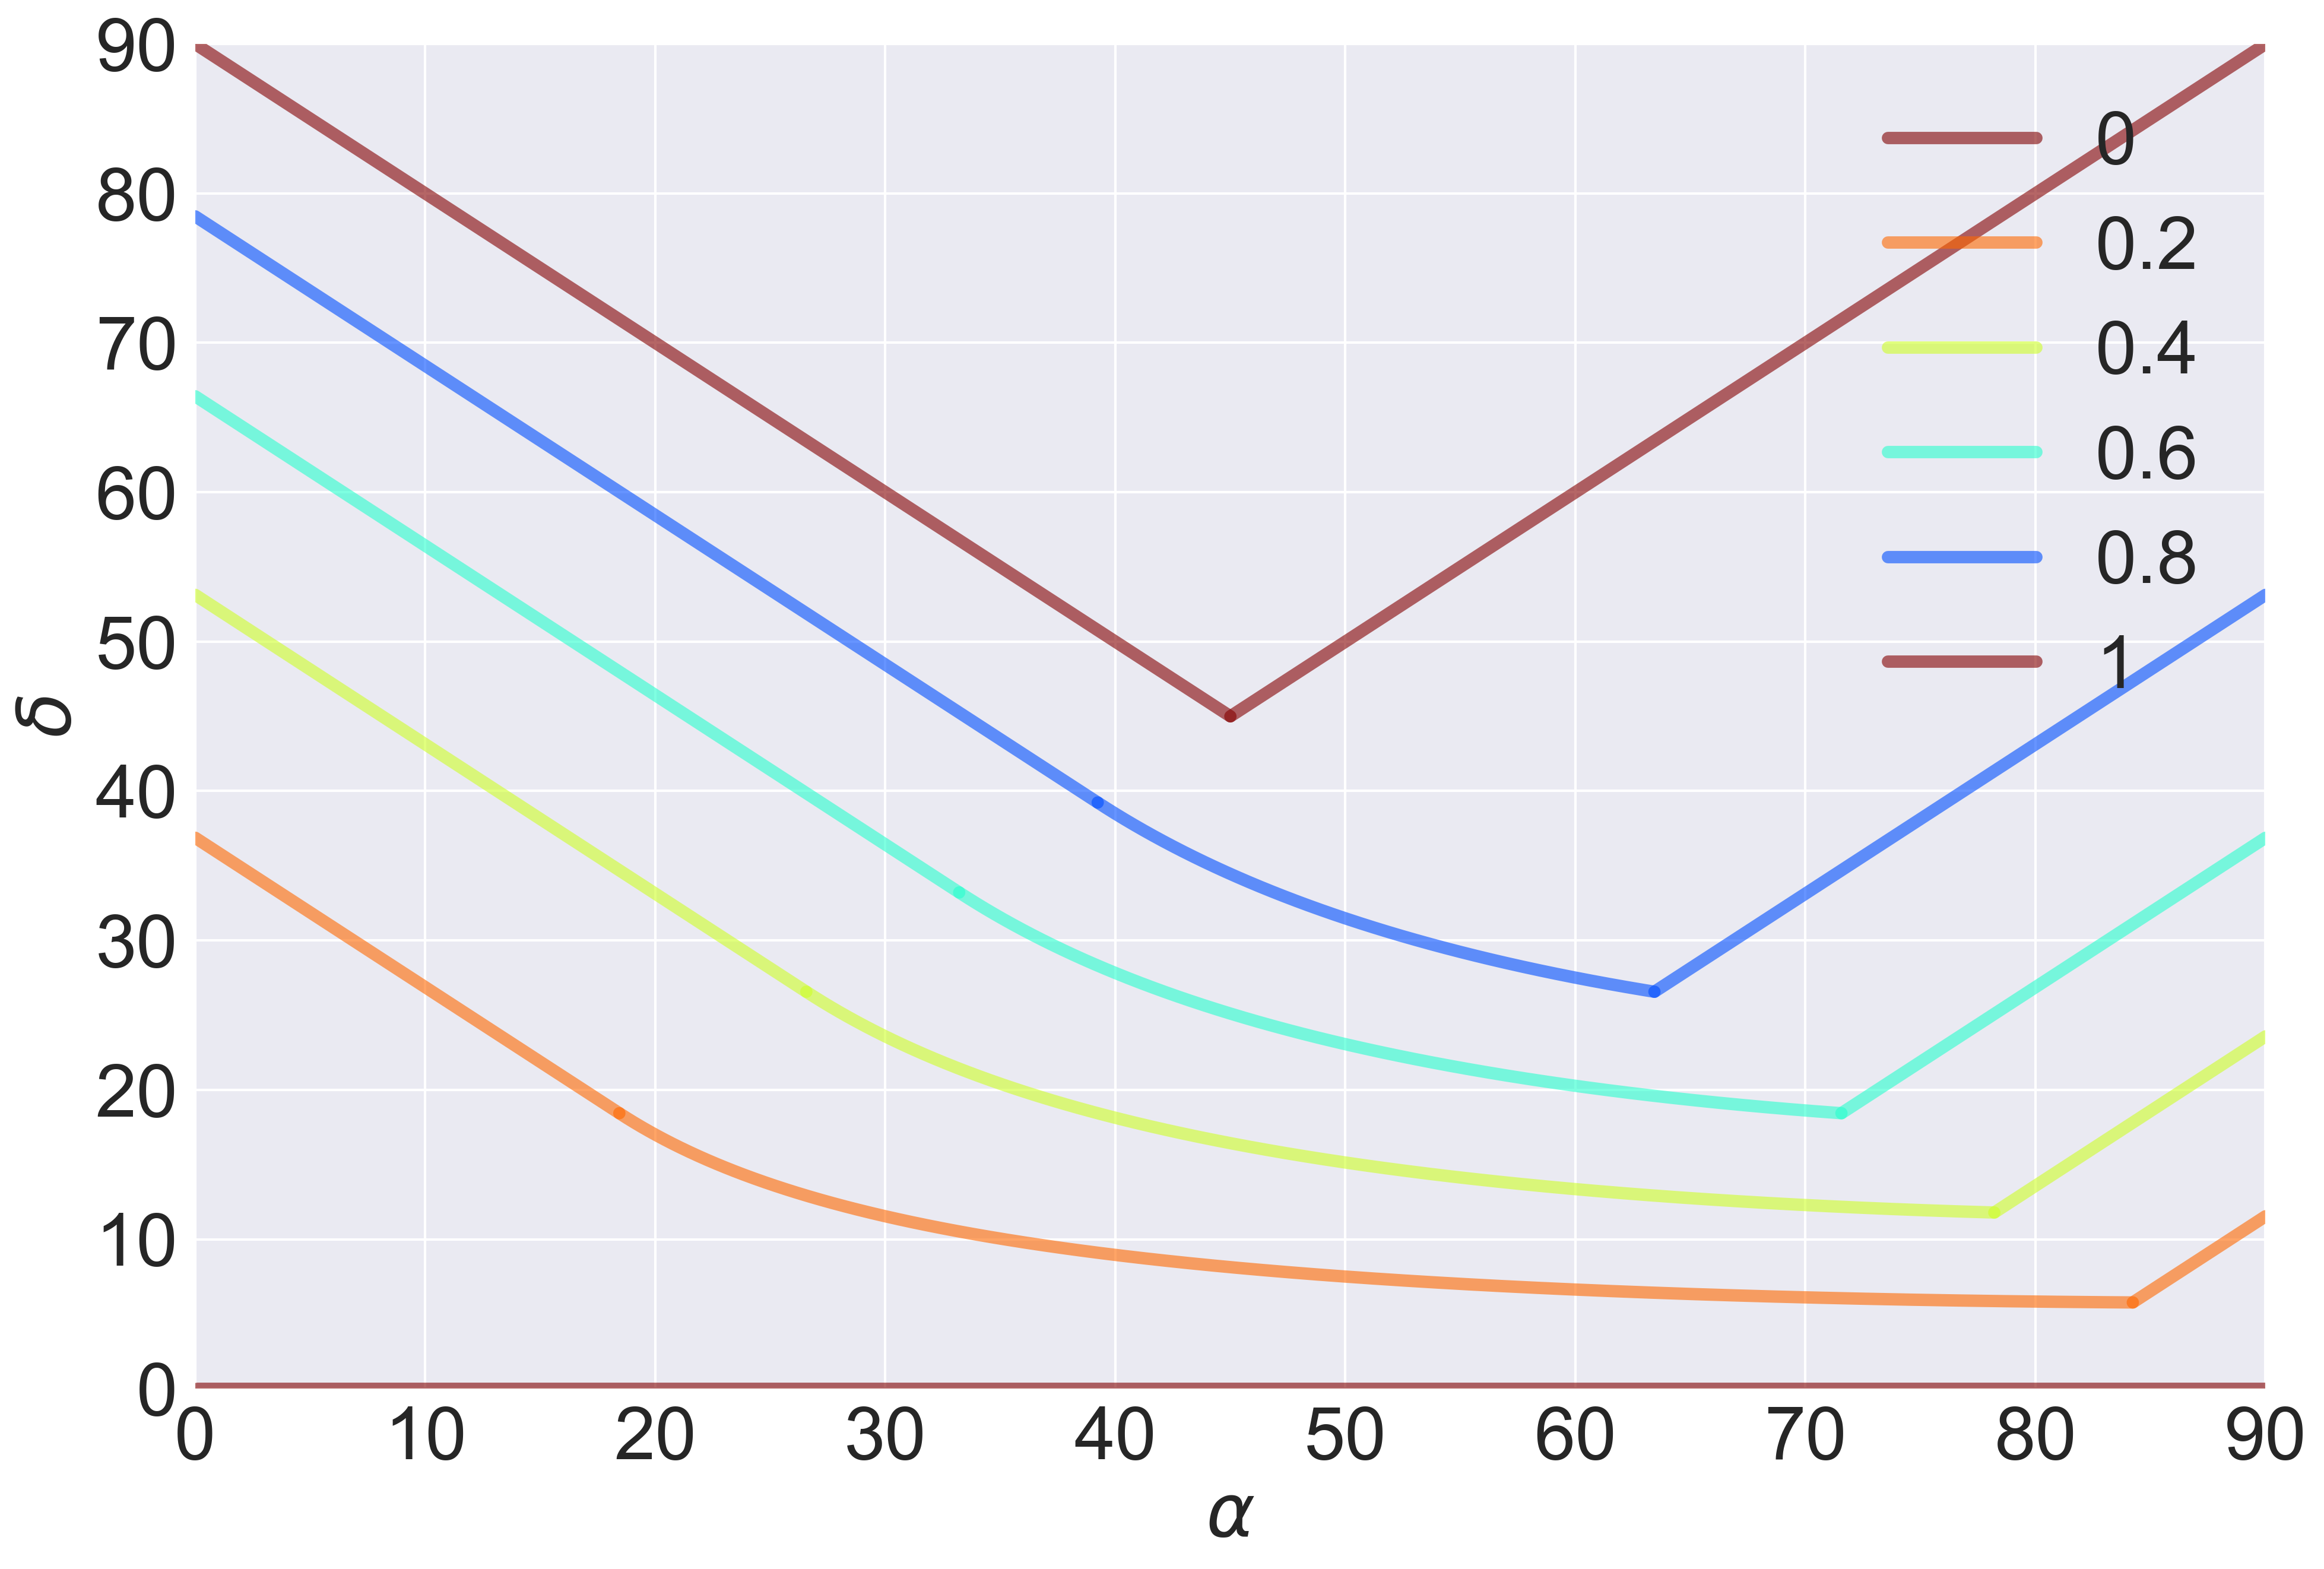

In [2]:
def opening_angle_1(alpha,r):
    return np.arccos(1.-r)-alpha

def opening_angle_2(alpha,r):
    return np.arcsin(0.5*r/np.sin(alpha))

def opening_angle_3(alpha,r):
    return alpha - np.arccos(r)

# alpha = angle between rotational and magnetic axis
# delta = radio cone half opening angle

# r = area of cone section/2pi = F_RL = 1 - F_RQ
r = [0,0.2,0.4,0.6,0.8,1]

cmap = plt.get_cmap('jet_r')

fig, ax = plt.subplots(figsize=(15, 10), dpi=300)
plt.ylabel(r'$\delta$',fontsize=30)
plt.xlabel(r'$\alpha$',fontsize=30)
plt.tick_params(labelsize=30)

for i in r:
    color = cmap(i)
    
    alpha = np.linspace(0., 0.5*np.arccos(1.-i), 1000)
    plt.plot(alpha*180./np.pi, opening_angle_1(alpha,i)*180./np.pi, c=color, label=i, lw=5., alpha=0.6)
    
    alpha = np.linspace(np.arcsin(np.sqrt(0.5*i)), 0.5*np.pi - 0.5*np.arcsin(i), 1000)
    plt.plot(alpha*180./np.pi, opening_angle_2(alpha,i)*180./np.pi, c=color, lw=5., alpha=0.6)
    
    alpha = np.linspace(0.25*np.pi + 0.5*np.arccos(i), 0.5*np.pi, 1000)
    plt.plot(alpha*180./np.pi, opening_angle_3(alpha,i)*180./np.pi, c=color, lw=5., alpha=0.6)

plt.legend(fontsize=30)
plt.xlim(0.,90.)
plt.ylim(0.,90.)

# calculated based on log P BEST technique

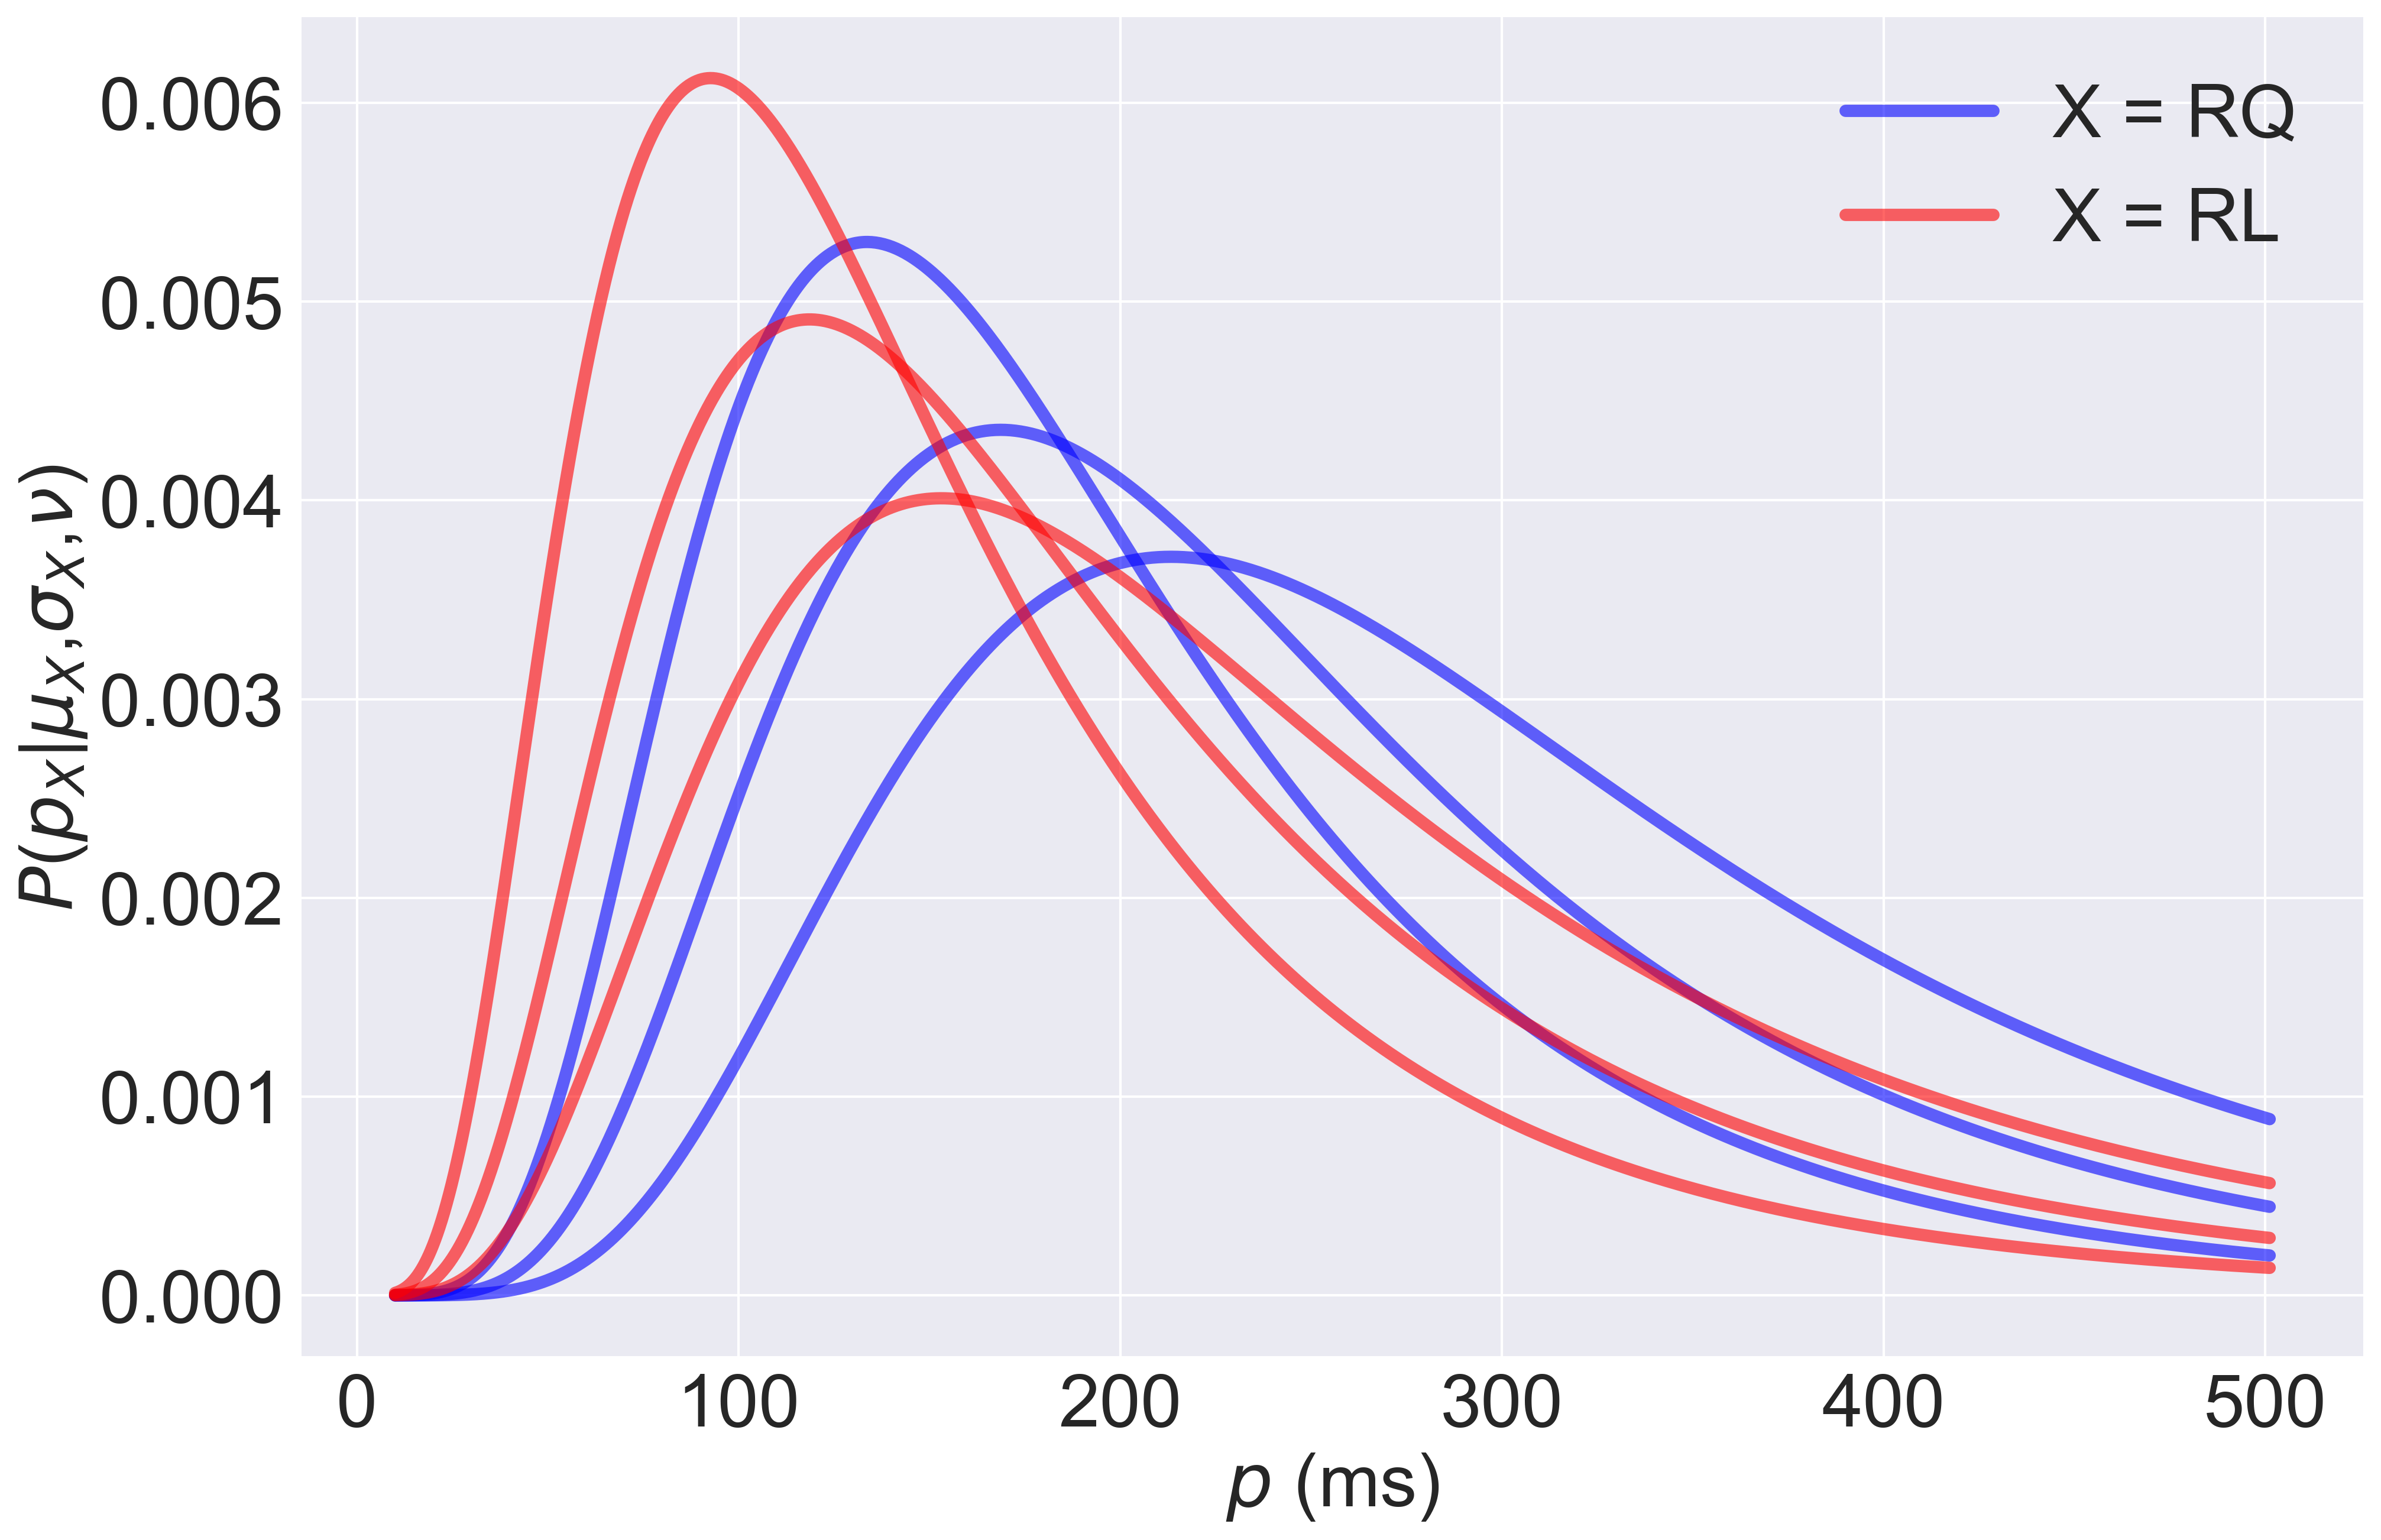

In [62]:
# x is spin period p in millisecond
x = np.linspace(1.,2.7,1000)
p = 10**x

# mean mean and mean std pdf for RQ and RL
meanRQ = t.pdf(x, df=39.044, loc=2.227, scale=0.218)
prob_meanRQ = meanRQ/simps(meanRQ, p)

meanRL = t.pdf(x, df=39.044, loc=2.074, scale=0.257)
prob_meanRL = meanRL/simps(meanRL, p)

# 3 simga lower limit mean and mean std pdf for RQ and RL
lowerRQ = t.pdf(x, df=39.044, loc=2.329, scale=0.218)
prob_lowerRQ = lowerRQ/simps(lowerRQ, p)

lowerRL = t.pdf(x, df=39.044, loc=2.185, scale=0.257)
prob_lowerRL = lowerRL/simps(lowerRL, p)

# 3 simga upper limit mean and mean std pdf for RQ and RL
upperRQ = t.pdf(x, df=39.044, loc=2.126, scale=0.218)
prob_upperRQ = upperRQ/simps(upperRQ, p)

upperRL = t.pdf(x, df=39.044, loc=1.967, scale=0.257)
prob_upperRL = upperRL/simps(upperRL, p)

fig, ax = plt.subplots(figsize=(15, 10), dpi=300)

plt.plot(p, prob_meanRQ, color='blue', label='X = RQ', lw=5., alpha=0.6)
plt.plot(p, prob_lowerRQ, color='blue', lw=5., alpha=0.6)
plt.plot(p, prob_upperRQ, color='blue', lw=5., alpha=0.6)
plt.plot(p, prob_meanRL, color='red', label='X = RL', lw=5., alpha=0.6)
plt.plot(p, prob_lowerRL, color='red', lw=5., alpha=0.6)
plt.plot(p, prob_upperRL, color='red', lw=5., alpha=0.6)

plt.legend(fontsize=30)
plt.ylabel(r'$P$($p_{X}$|$\mu_{X}$,$\sigma_{X}$,$\nu$)',fontsize=30)
plt.xlabel(r'$p$ (ms)',fontsize=30)
plt.tick_params(labelsize=30)
#plt.xlabel('log [P (ms)]')

#  following analysis same for Hui+2017 and Sokolova+2016

P({p_RQ}|model)/P({p_RL}|model) detected = 1 happens at p = 159.001565894 ms
3 simga lower limit of P({p_RQ}|model)/P({p_RL}|model) detected = 1 happens at p = 196.468664618 ms
3 simga upper limit of P({p_RQ}|model)/P({p_RL}|model) detected = 1 happens at p = 127.675070432 ms


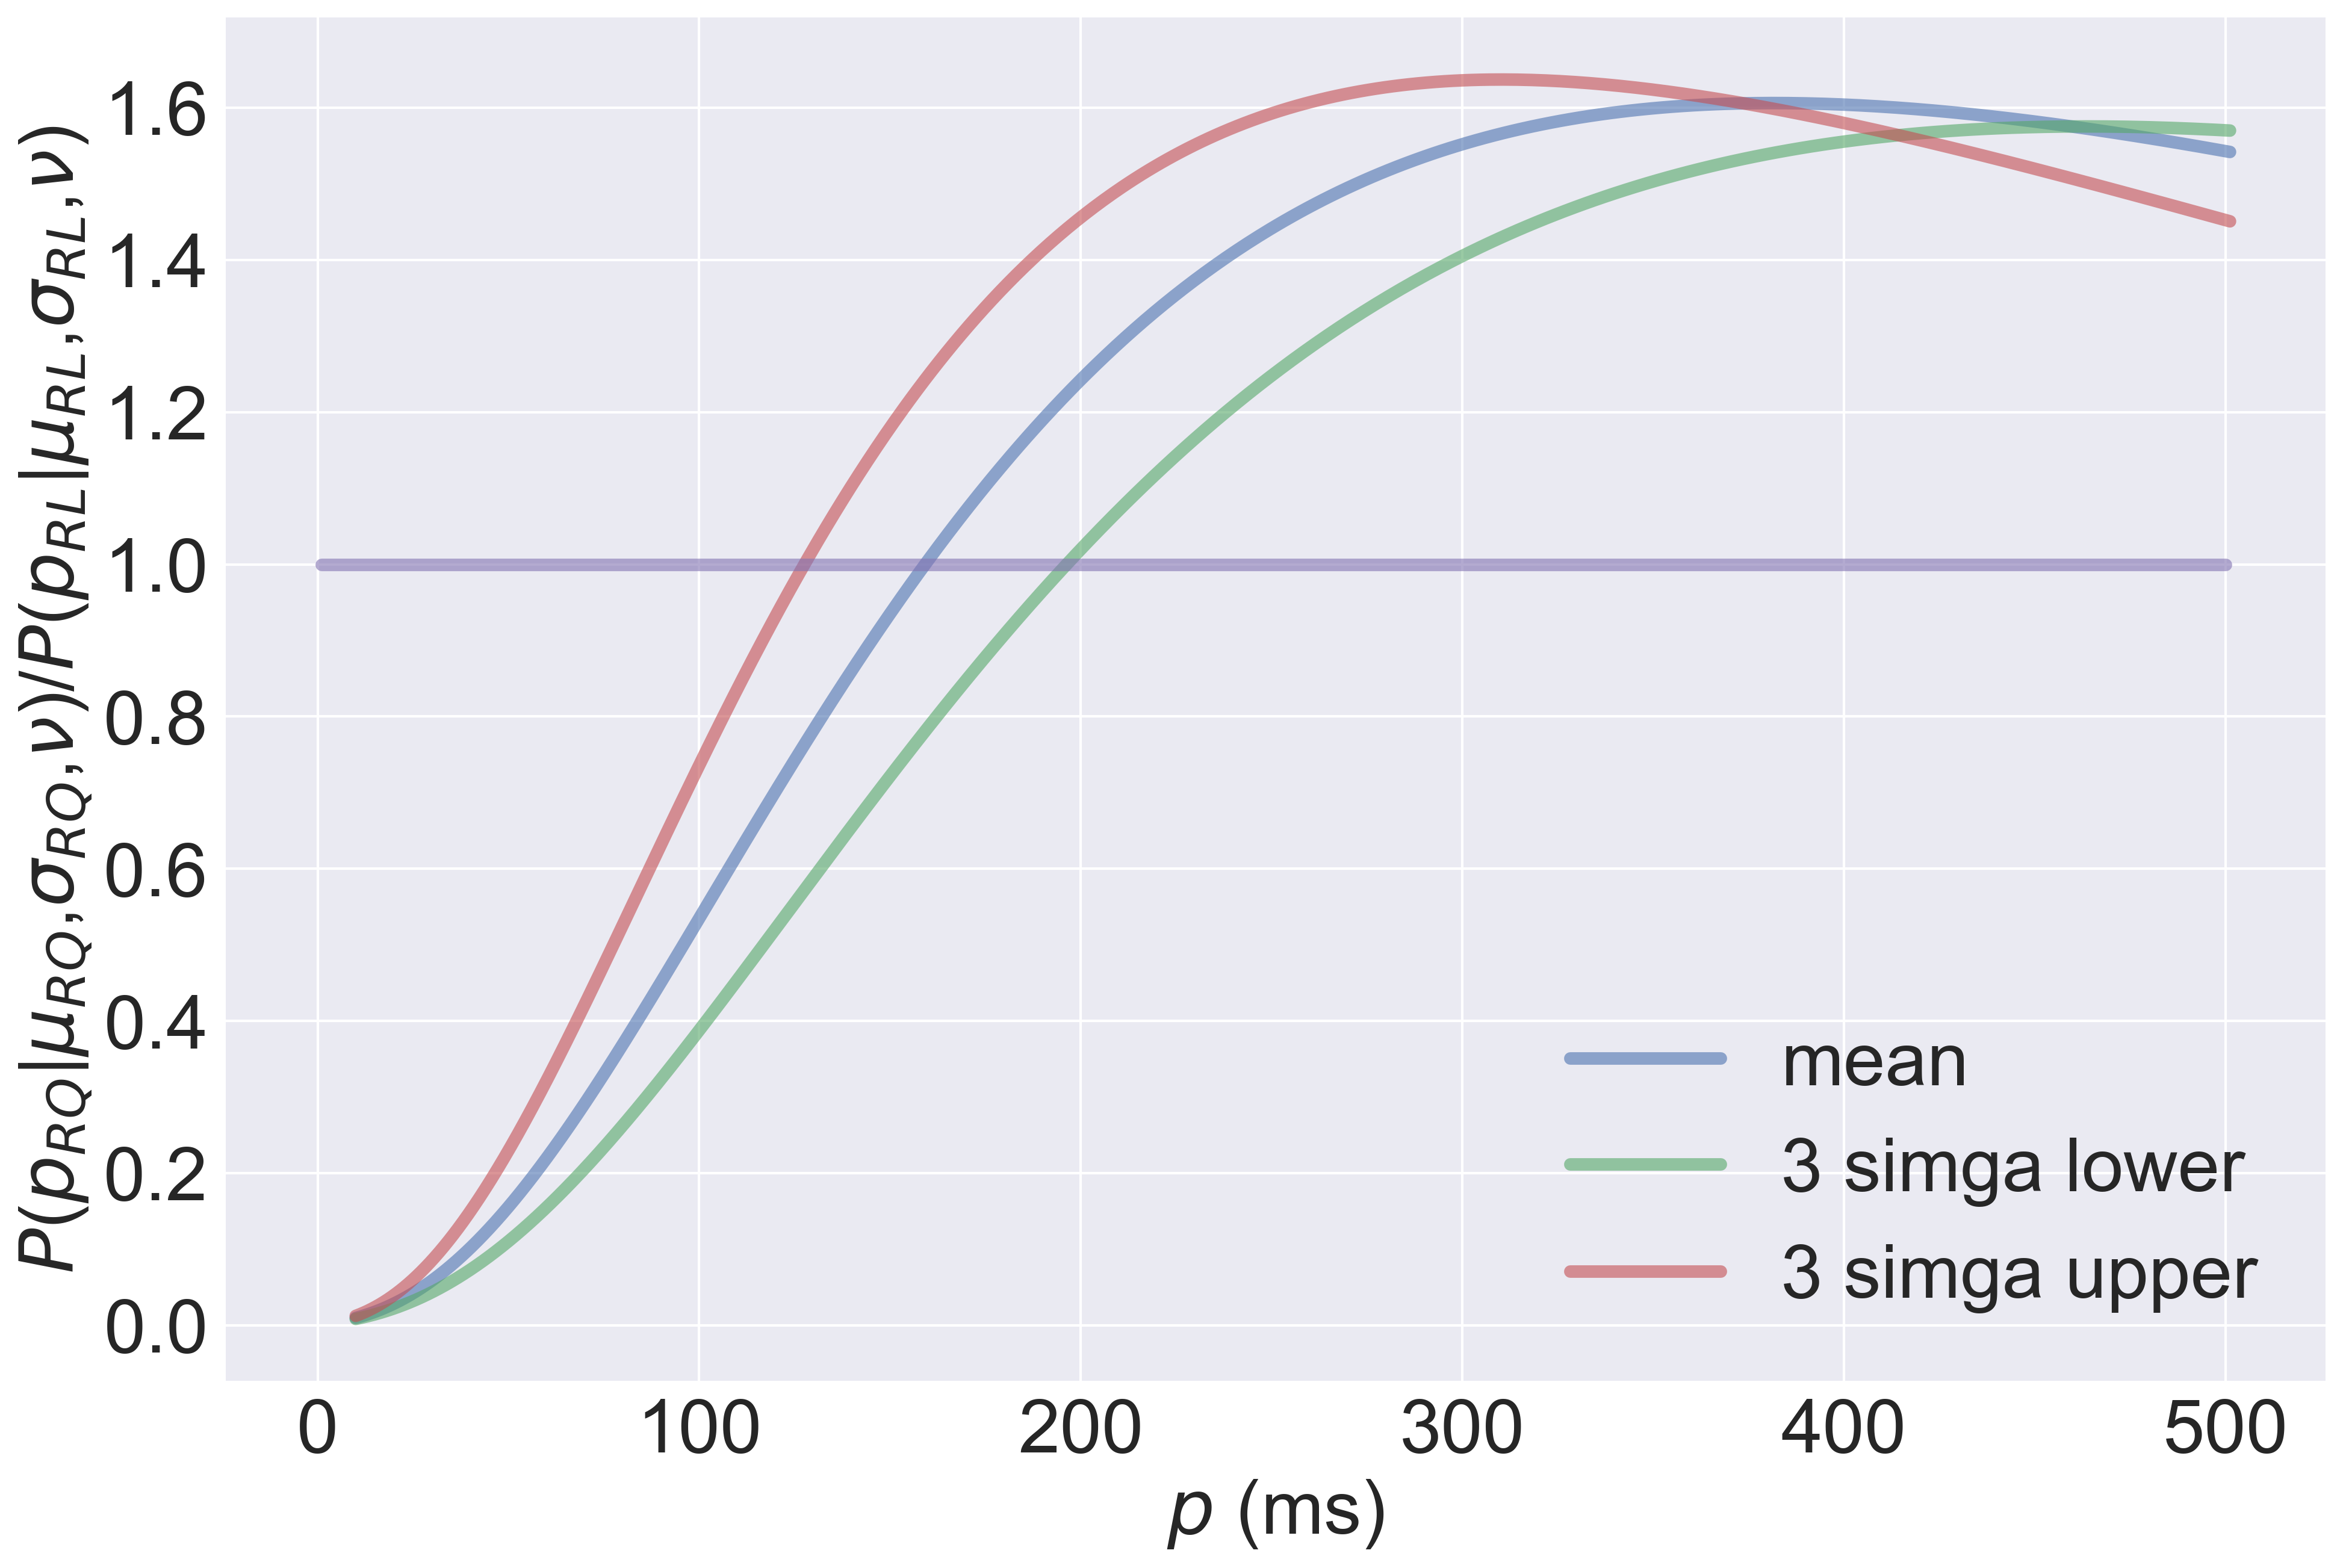

In [63]:
# P({p_RQ}|model)/P({p_RL}|model)
fig, ax = plt.subplots(figsize=(15, 10), dpi=300)

prob_mean_Ratio = prob_meanRQ/prob_meanRL
plt.plot(p, prob_mean_Ratio, label='mean', lw=5., alpha=0.6)
print 'P({p_RQ}|model)/P({p_RL}|model) detected = 1 happens at p =', 10**(x[min(range(len(prob_mean_Ratio)), key=lambda i:abs(prob_mean_Ratio[i]-1.))]), 'ms'

prob_lower_Ratio = prob_lowerRQ/prob_lowerRL
plt.plot(p, prob_lower_Ratio, label='3 simga lower', lw=5., alpha=0.6)
print '3 simga lower limit of P({p_RQ}|model)/P({p_RL}|model) detected = 1 happens at p =', 10**(x[min(range(len(prob_lower_Ratio)), key=lambda i:abs(prob_lower_Ratio[i]-1.))]), 'ms'

prob_upper_Ratio = prob_upperRQ/prob_upperRL
plt.plot(p, prob_upper_Ratio, label='3 simga upper', lw=5., alpha=0.6)
print '3 simga upper limit of P({p_RQ}|model)/P({p_RL}|model) detected = 1 happens at p =', 10**(x[min(range(len(prob_upper_Ratio)), key=lambda i:abs(prob_upper_Ratio[i]-1.))]), 'ms'

# for reference
plt.plot([1,500],[1,1], lw=5., alpha=0.6)

plt.legend(fontsize=30)
plt.ylabel(r'$P$($p_{RQ}$|$\mu_{RQ}$,$\sigma_{RQ}$,$\nu$)/$P$($p_{RL}$|$\mu_{RL}$,$\sigma_{RL}$,$\nu$)',fontsize=30)
plt.xlabel(r'$p$ (ms)',fontsize=30)
plt.tick_params(labelsize=30)
#plt.xlabel('log [P (ms)]')

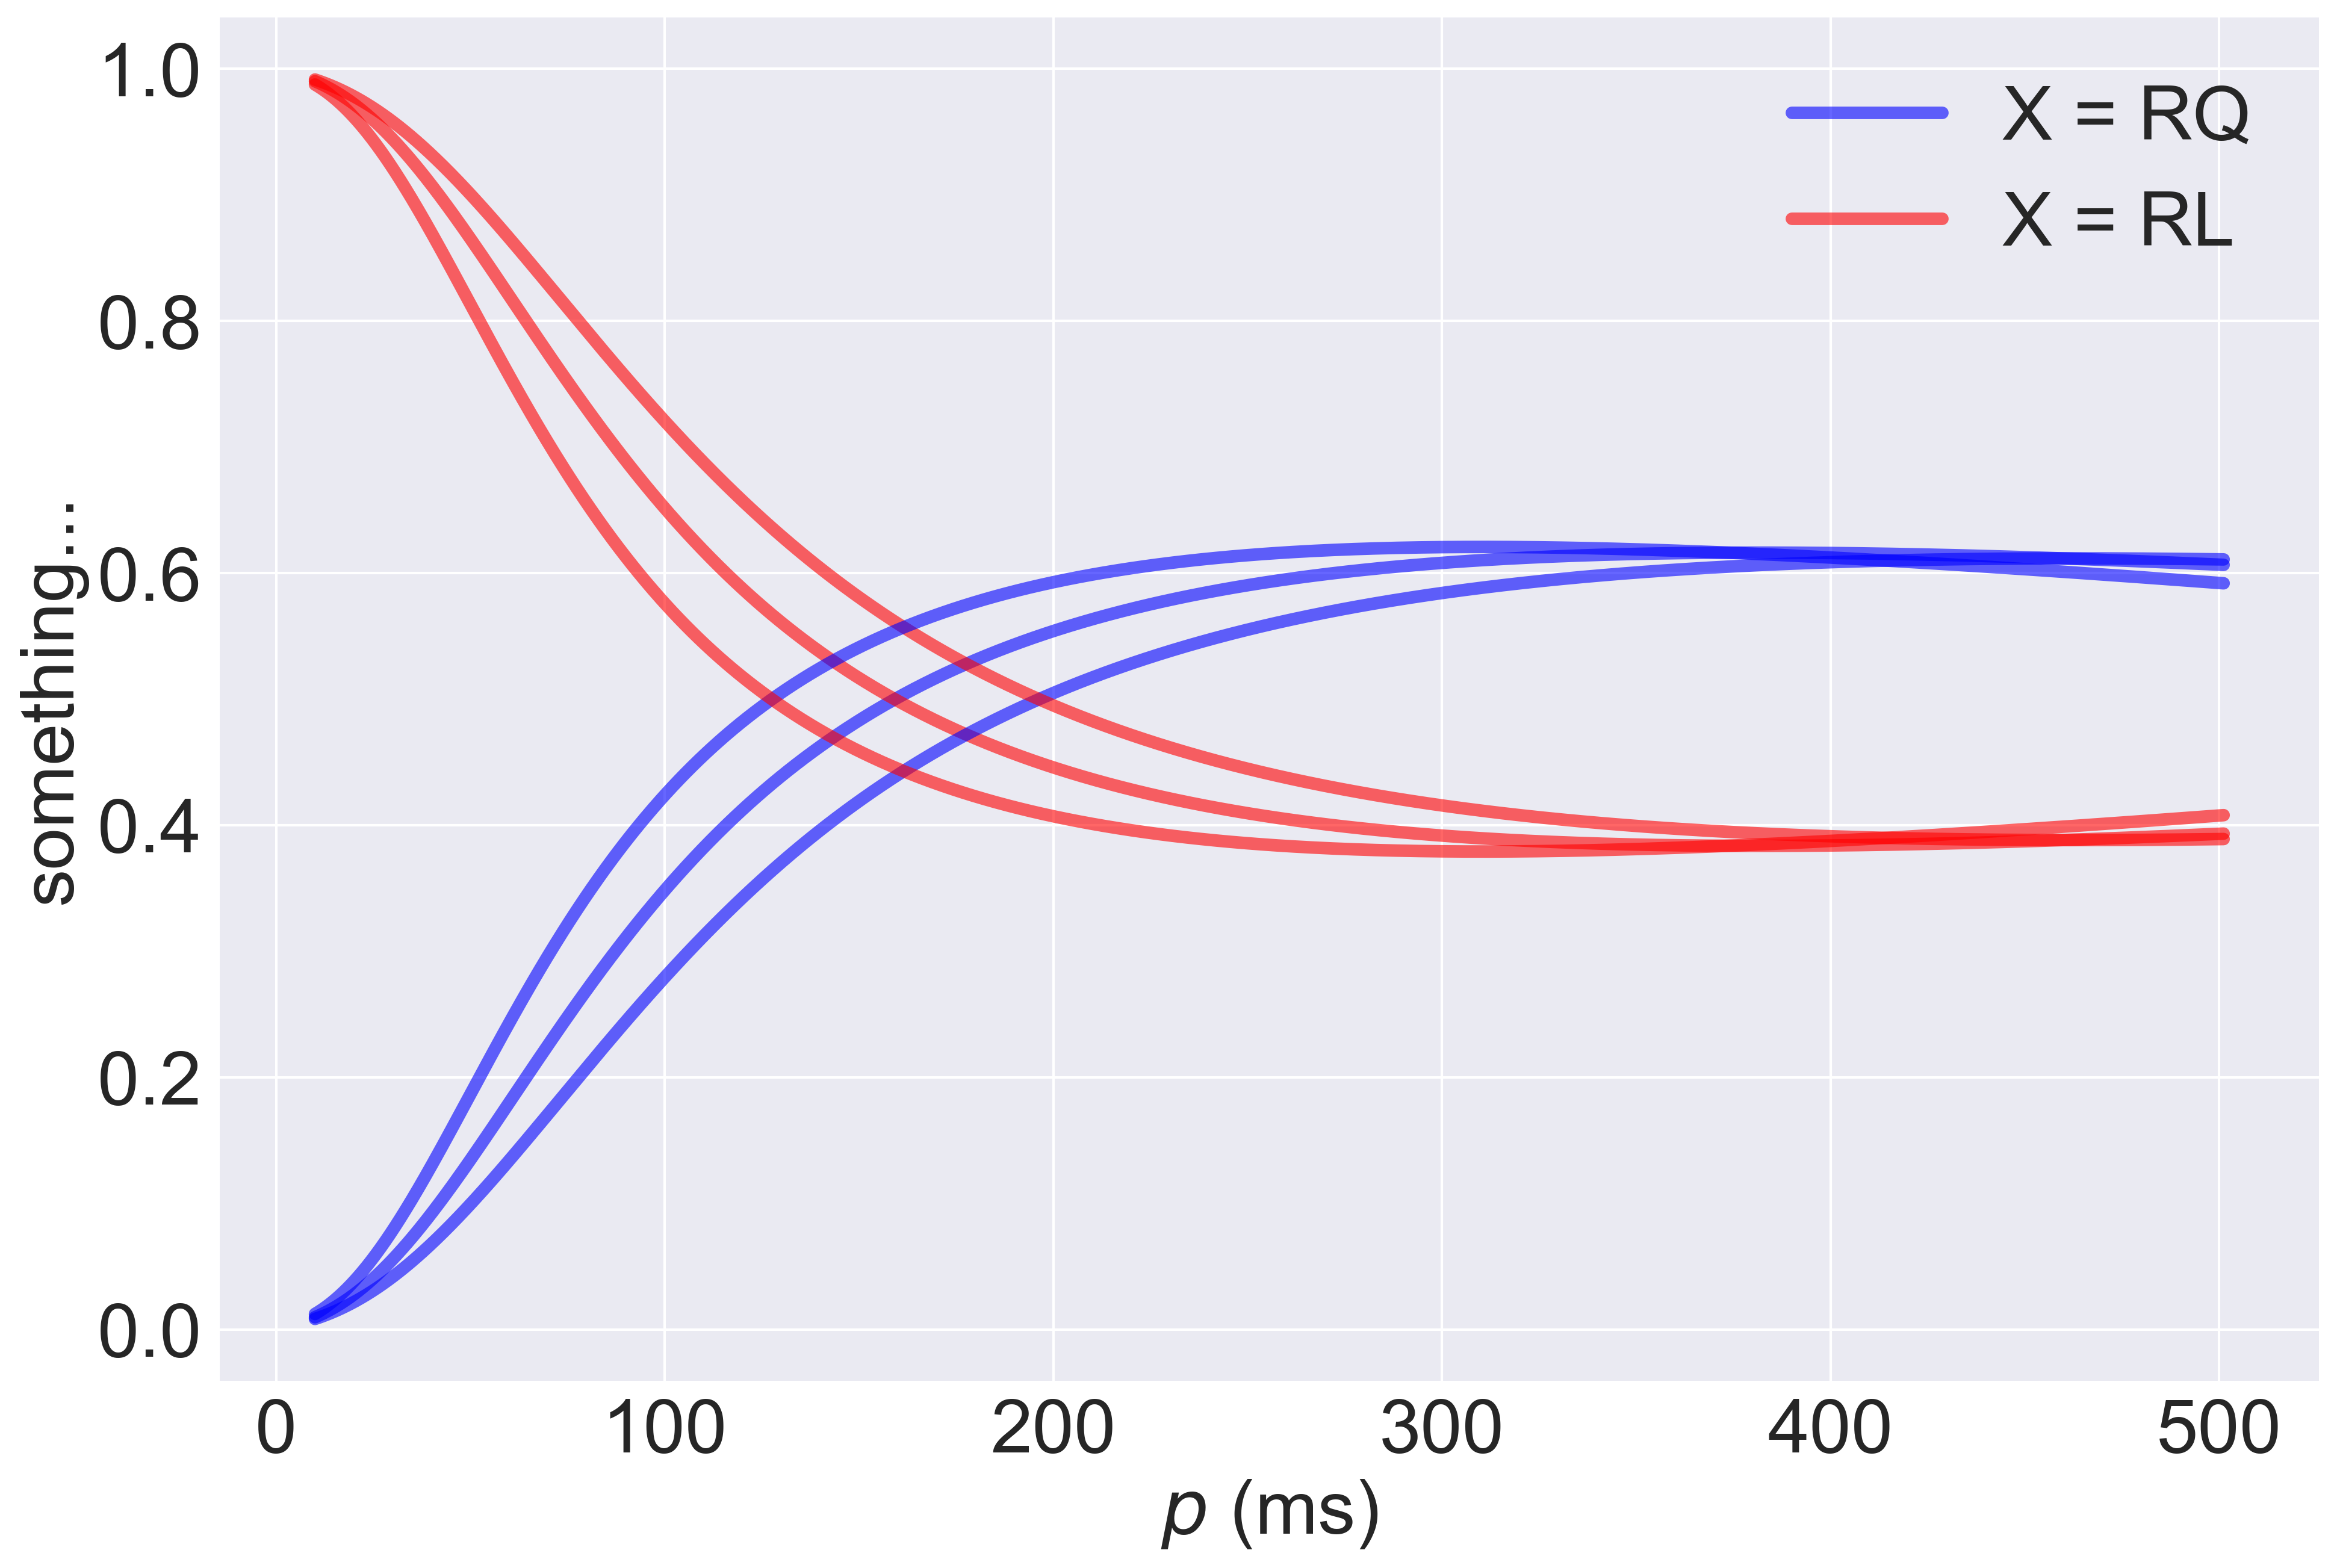

In [64]:
# I don't understand what this figure means...
fig, ax = plt.subplots(figsize=(15, 10), dpi=300)

plt.plot(p, prob_mean_Ratio/(1.+prob_mean_Ratio), label='X = RQ', color='blue', lw=5., alpha=0.6)
plt.plot(p, 1./(1.+prob_mean_Ratio), label='X = RL', color='red', lw=5., alpha=0.6)

plt.plot(p, prob_lower_Ratio/(1.+prob_lower_Ratio), color='blue', lw=5., alpha=0.6)
plt.plot(p, 1./(1.+prob_lower_Ratio), color='red', lw=5., alpha=0.6)

plt.plot(p, prob_upper_Ratio/(1+prob_upper_Ratio), color='blue', lw=5., alpha=0.6)
plt.plot(p, 1./(1.+prob_upper_Ratio), color='red', lw=5., alpha=0.6)

plt.legend(fontsize=30)
plt.ylabel('something...',fontsize=30)
plt.xlabel(r'$p$ (ms)',fontsize=30)
plt.tick_params(labelsize=30)
#plt.xlabel('log [P (ms)]')

# import the data

In [3]:
loudFile = open('radio-loud.txt','r')
loudRows = (loudRow.strip().split() for loudRow in loudFile)
lR = zip(*loudRows)
quietFile = open('radio-quiet.txt','r')
quietRows = (quietRow.strip().split() for quietRow in quietFile)
qR = zip(*quietRows)

# log P

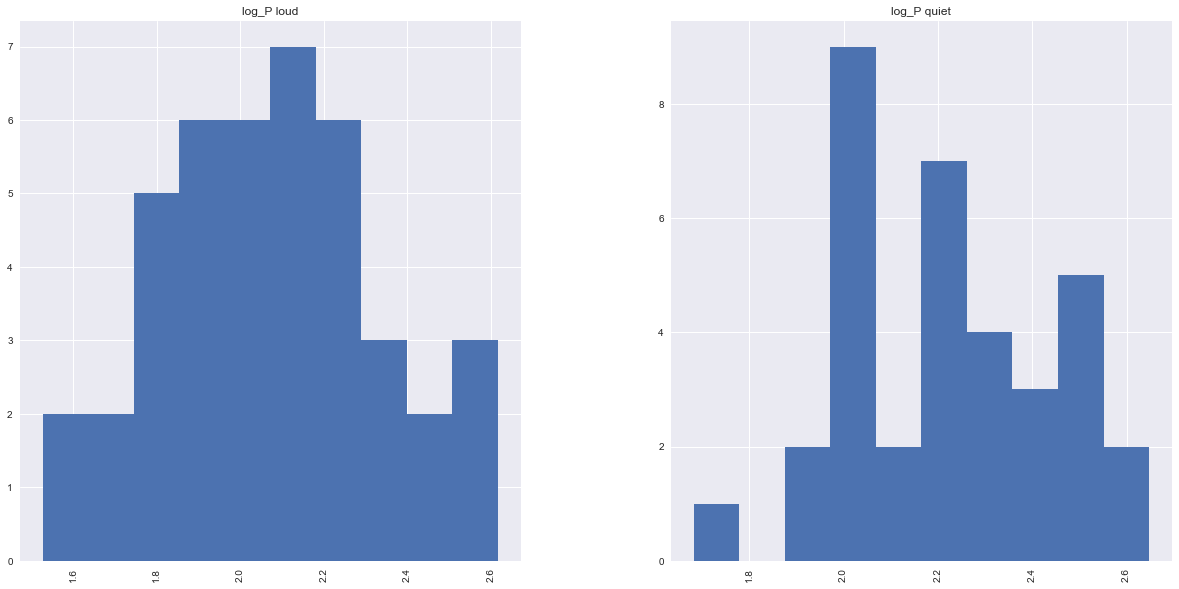

In [4]:
log_P_quiet = np.array(map(float, qR[1]))
log_P_loud = np.array(map(float, lR[1]))

y1 = np.log10(log_P_quiet)
y2 = np.log10(log_P_loud)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['log_P quiet']*len(log_P_quiet), ['log_P loud']*len(log_P_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [5]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [6]:
with model:
    trace = pm.sample(20000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 22000/22000 [00:26<00:00, 843.90it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x119000d50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1128cc850>], dtype=object)

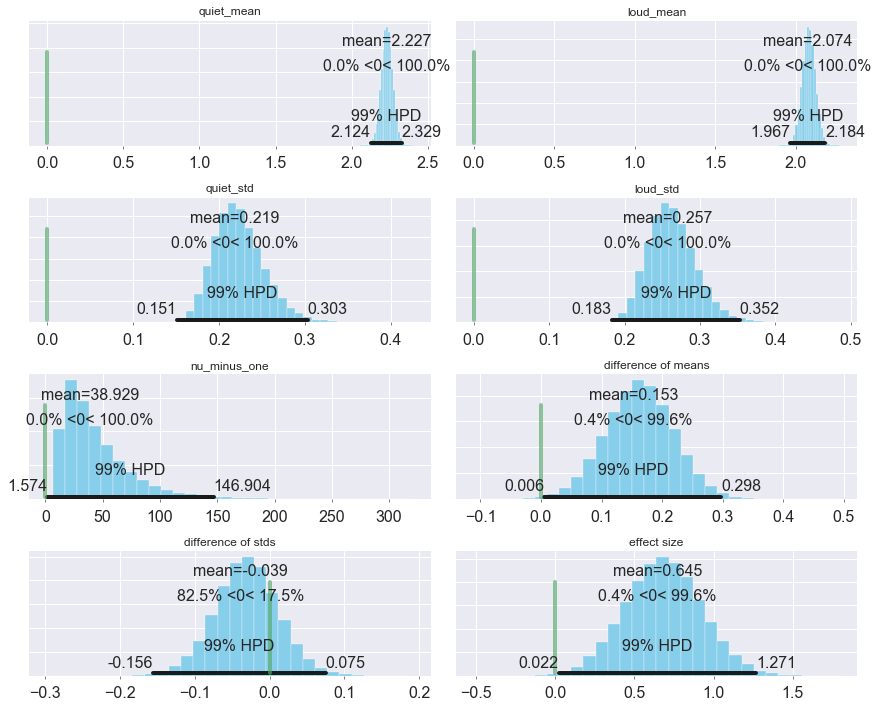

In [7]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [8]:
pm.df_summary(trace, alpha=0.01)

mean         sd  mc_error   hpd_0.5    hpd_99.5
quiet_mean            2.227299   0.038475  0.000144  2.124112    2.328634
loud_mean             2.074241   0.041290  0.000118  1.967095    2.183611
quiet_std             0.218510   0.029364  0.000105  0.150500    0.303192
loud_std              0.257228   0.032016  0.000118  0.183103    0.352484
nu_minus_one         38.929246  30.500388  0.104503  1.573574  146.904390
difference of means   0.153058   0.056364  0.000180  0.005567    0.297533
difference of stds   -0.038717   0.042719  0.000135 -0.155916    0.074840
effect size           0.644663   0.242986  0.000785  0.022326    1.270730

In [9]:
a = pm.trace_to_dataframe(trace)

In [11]:
x = np.linspace(1.,2.7,500)
p = 10**x

(array([ 0.001443  ,  0.001443  ,  0.00577201,  0.00865801,  0.004329  ,
         0.004329  ,  0.004329  ,  0.002886  ,  0.001443  ,  0.002886  ,
         0.001443  ,  0.001443  ,  0.002886  ,  0.002886  ,  0.001443  ,
         0.        ,  0.001443  ,  0.        ,  0.        ,  0.001443  ]),
 array([  48.1,   67.9,   87.7,  107.5,  127.3,  147.1,  166.9,  186.7,
         206.5,  226.3,  246.1,  265.9,  285.7,  305.5,  325.3,  345.1,
         364.9,  384.7,  404.5,  424.3,  444.1]),
 <a list of 20 Patch objects>)

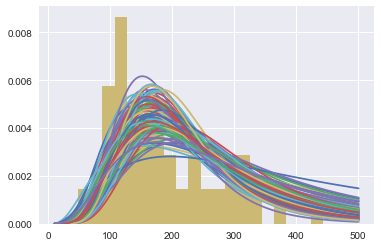

In [18]:
import random

nRan = 100
N = random.sample(range(0, 80000), nRan)

for i in N:
    tmp = t.pdf(x, df=a.get_value(i,'nu_minus_one')+1, loc=a.get_value(i,'quiet_mean'), scale=a.get_value(i,'quiet_std'))
    norm = simps(tmp,p)
    plt.plot(p, tmp/norm)

plt.hist(log_P_quiet, bins=20, normed=True)

(array([ 0.00501121,  0.00626402,  0.00626402,  0.00876962,  0.00250561,
         0.00501121,  0.00626402,  0.00250561,  0.00250561,  0.0012528 ,
         0.        ,  0.0012528 ,  0.        ,  0.0012528 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.0012528 ,  0.00250561]),
 array([  33.6  ,   52.605,   71.61 ,   90.615,  109.62 ,  128.625,
         147.63 ,  166.635,  185.64 ,  204.645,  223.65 ,  242.655,
         261.66 ,  280.665,  299.67 ,  318.675,  337.68 ,  356.685,
         375.69 ,  394.695,  413.7  ]),
 <a list of 20 Patch objects>)

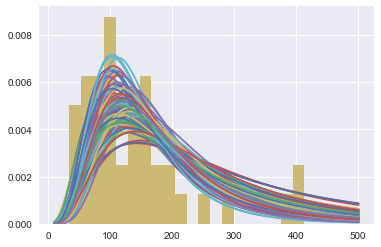

In [19]:
for i in N:
    tmp = t.pdf(x, df=a.get_value(i,'nu_minus_one')+1, loc=a.get_value(i,'loud_mean'), scale=a.get_value(i,'loud_std'))
    norm = simps(tmp,p)
    plt.plot(p, tmp/norm)

plt.hist(log_P_loud, bins=20, normed=True)

# P

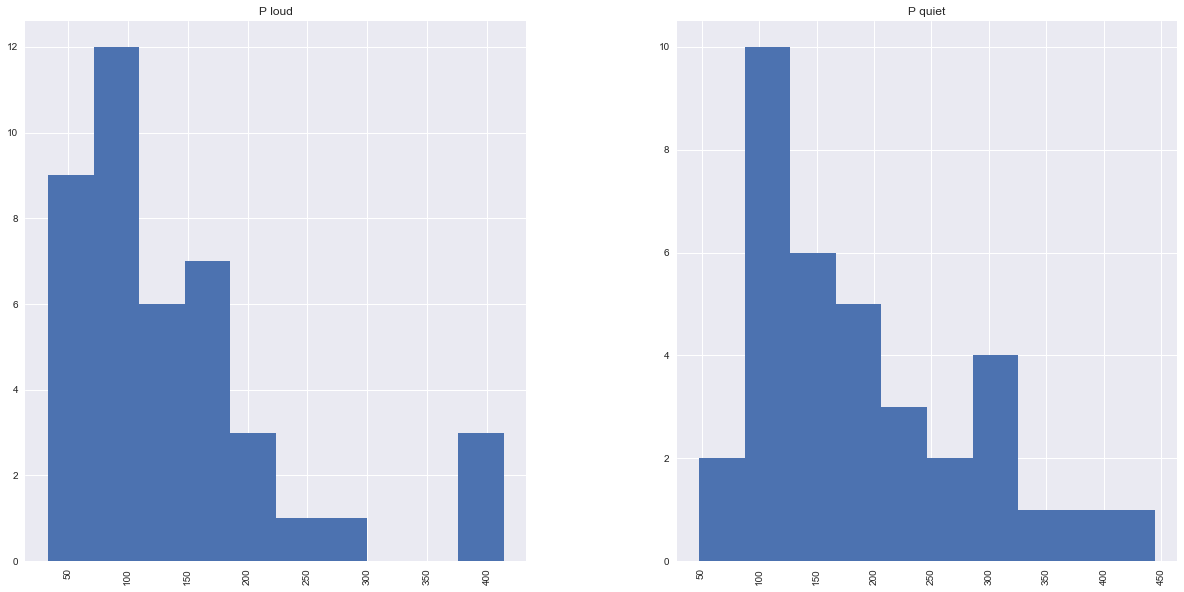

In [4]:
P_quiet = np.array(map(float, qR[1]))
P_loud = np.array(map(float, lR[1]))

y1 = P_quiet
y2 = P_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['P quiet']*len(P_quiet), ['P loud']*len(P_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [6]:
P_quiet, P_loud

(array([ 315.9,   83.2,  444.1,  333.2,  297.4,  237.1,  155.1,  111.5,
         139. ,  114.5,  109.7,  110.6,  115.8,  103.2,  171.9,  196.5,
         199.5,  106.3,  146.8,   48.1,  110.2,  173.3,  145.7,  225.6,
         106.6,   92.7,  374.8,  290.4,  265.3,  176.7,  227.1,  319.6,
         157.8,  282.8,  162.7]),
 array([  65.7,  217.1,   33.6,  287.8,  384.9,  251.7,  166.8,   89.4,
         106.8,   87.6,  107.4,  162.5,   91.4,  123.7,  197.1,   63.2,
          65. ,  408.7,  135.5,  166.2,   50.1,   68.2,   88.9,  151.5,
          84.2,  165. ,  182.2,  102.5,   74.7,  139.5,  413.7,   98.8,
         125. ,   61.9,  165.9,   39.5,  103.7,  200.1,  143.2,   96.1,
          51.6,  139.9]))

In [5]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [6]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:28<00:00, 669.51it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x114871990>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1155b9690>], dtype=object)

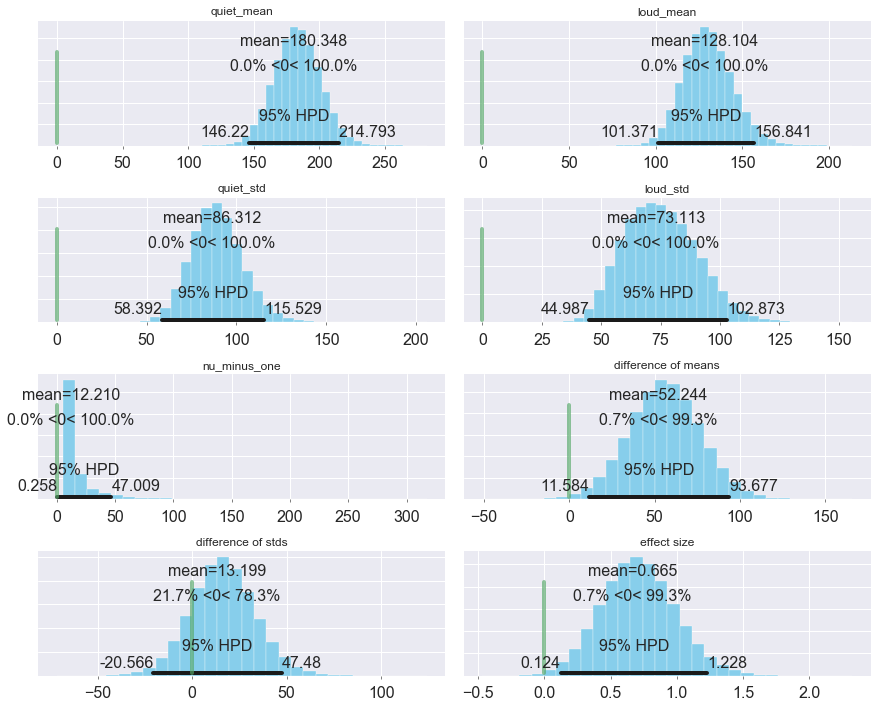

In [9]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x118b7db10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x120836e50>], dtype=object)

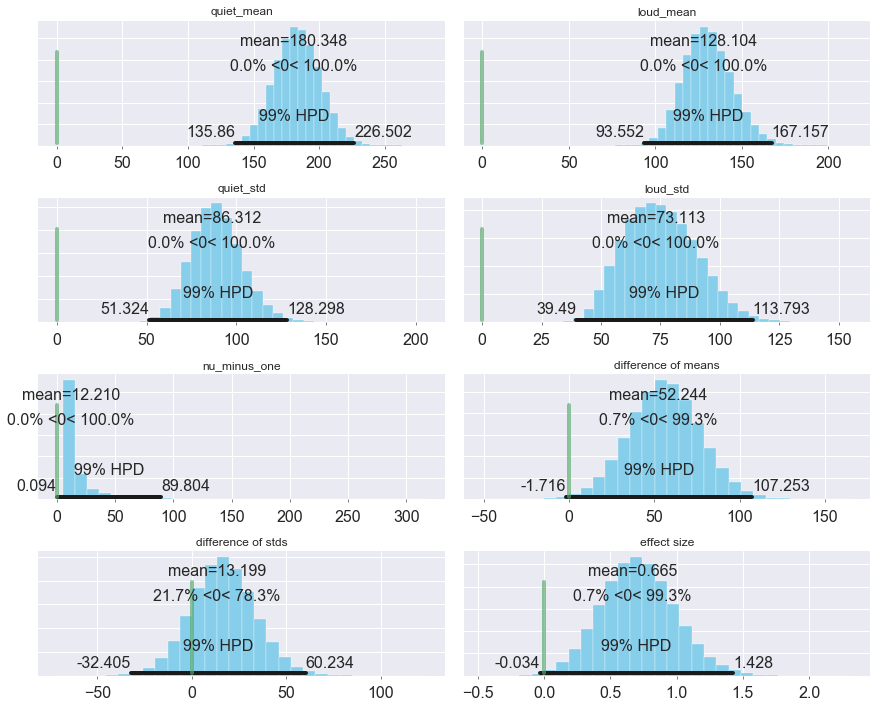

In [11]:
pm.plot_posterior(trace, alpha_level=0.01,
                  ref_val=0,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  color='#87ceeb')

# P dot

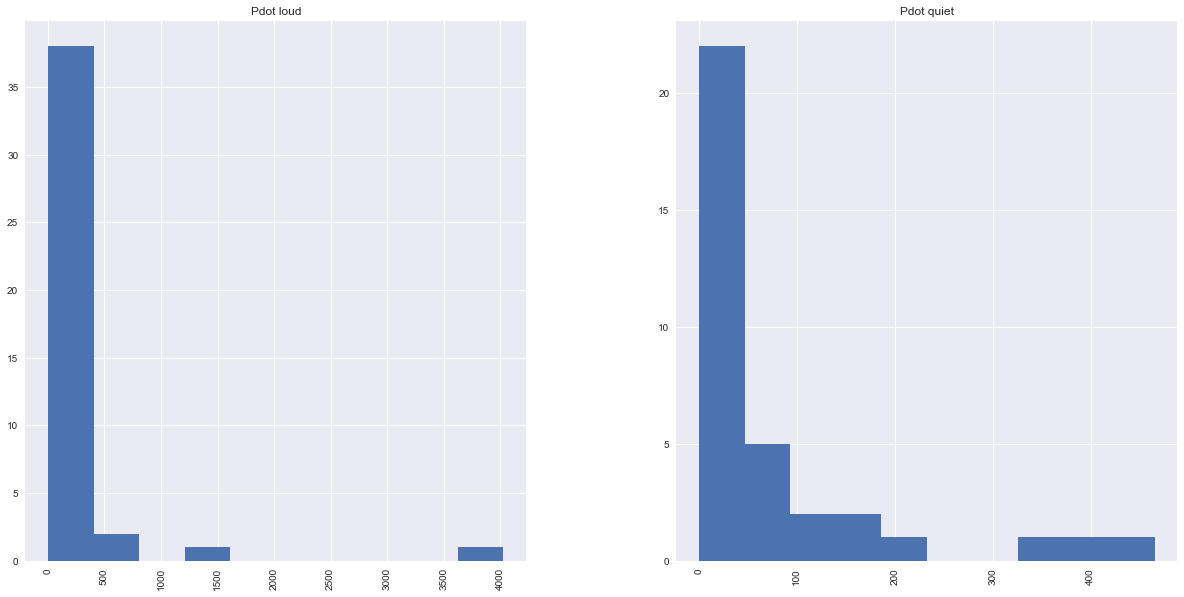

In [12]:
Pdot_quiet = np.array(map(float, qR[2]))
Pdot_loud = np.array(map(float, lR[2]))

y1 = Pdot_quiet
y2 = Pdot_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Pdot quiet']*len(Pdot_quiet), ['Pdot loud']*len(Pdot_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [13]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [14]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:21<00:00, 683.31it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1197f7e10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1169ebe10>], dtype=object)

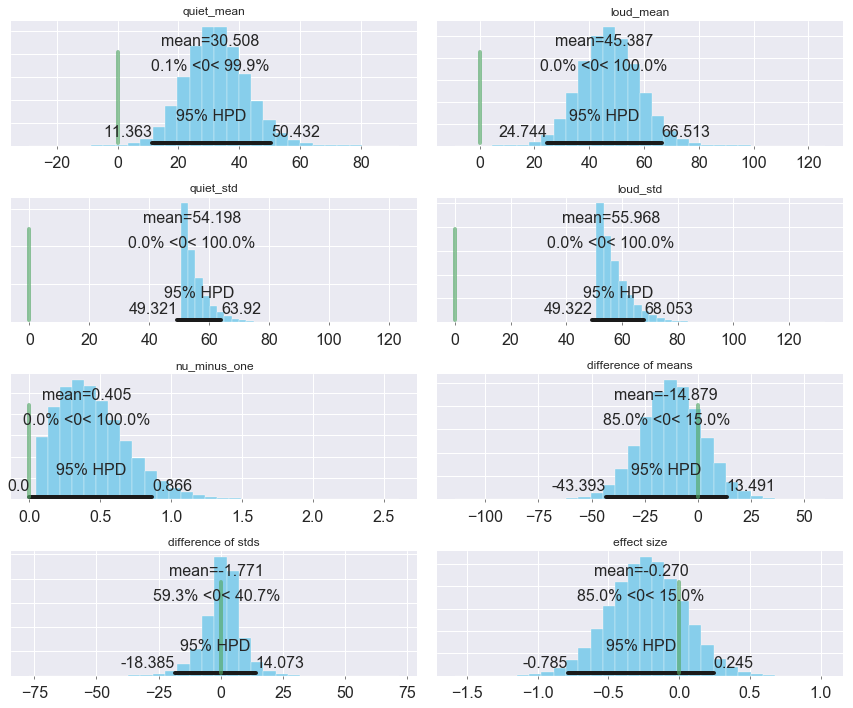

In [15]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d3a0050>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1246a48d0>], dtype=object)

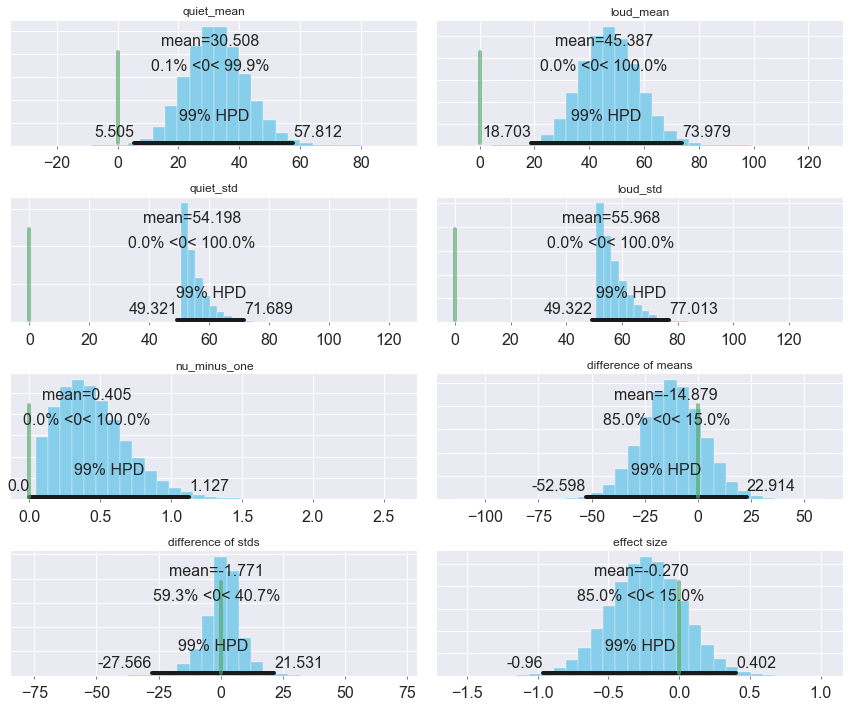

In [16]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Bs

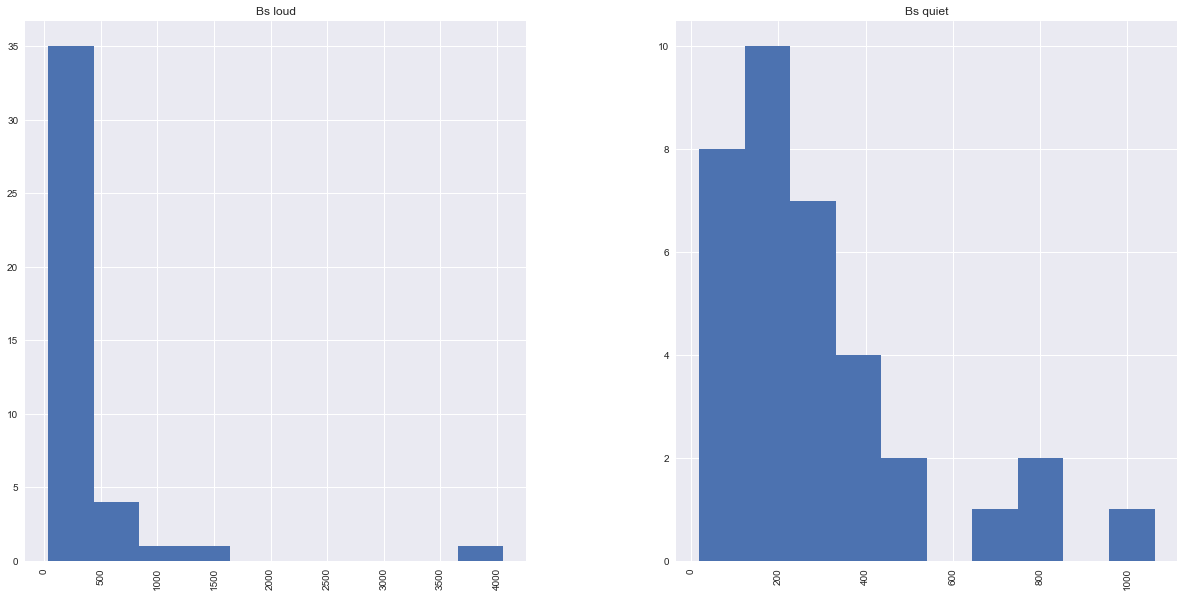

In [17]:
Bs_quiet = np.array(map(float, qR[3]))
Bs_loud = np.array(map(float, lR[3]))

y1 = Bs_quiet
y2 = Bs_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Bs quiet']*len(Bs_quiet), ['Bs loud']*len(Bs_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [18]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [19]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:05<00:00, 720.86it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a7bea50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119dbb790>], dtype=object)

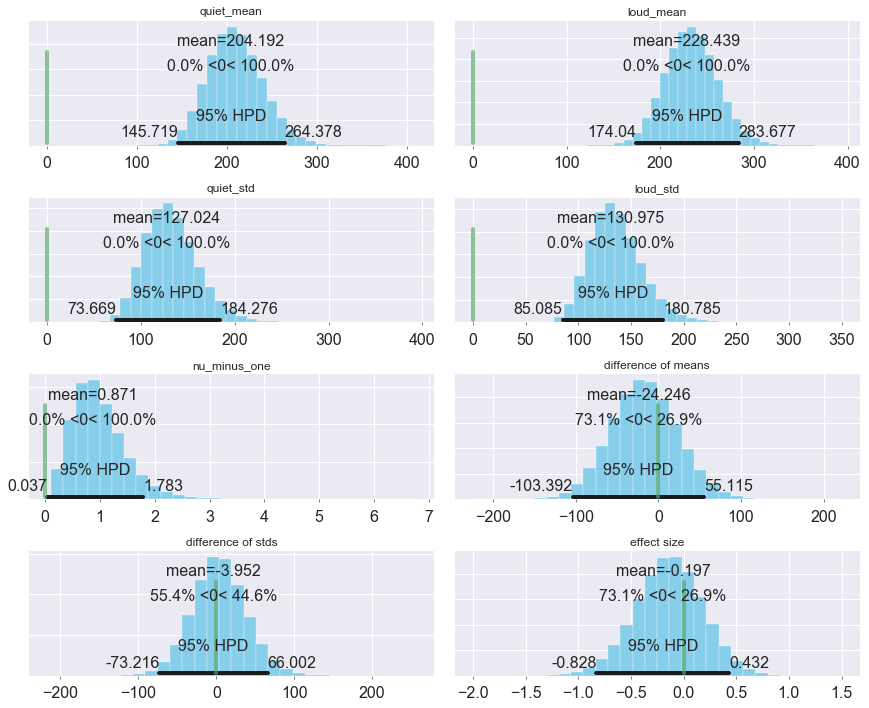

In [20]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119e9f490>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b2f0310>], dtype=object)

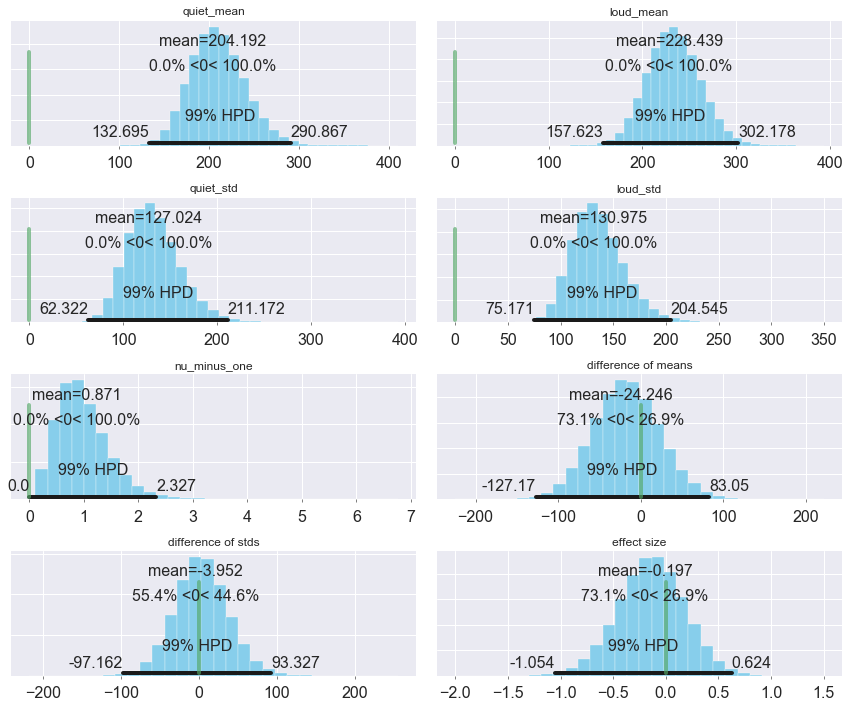

In [21]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Blc

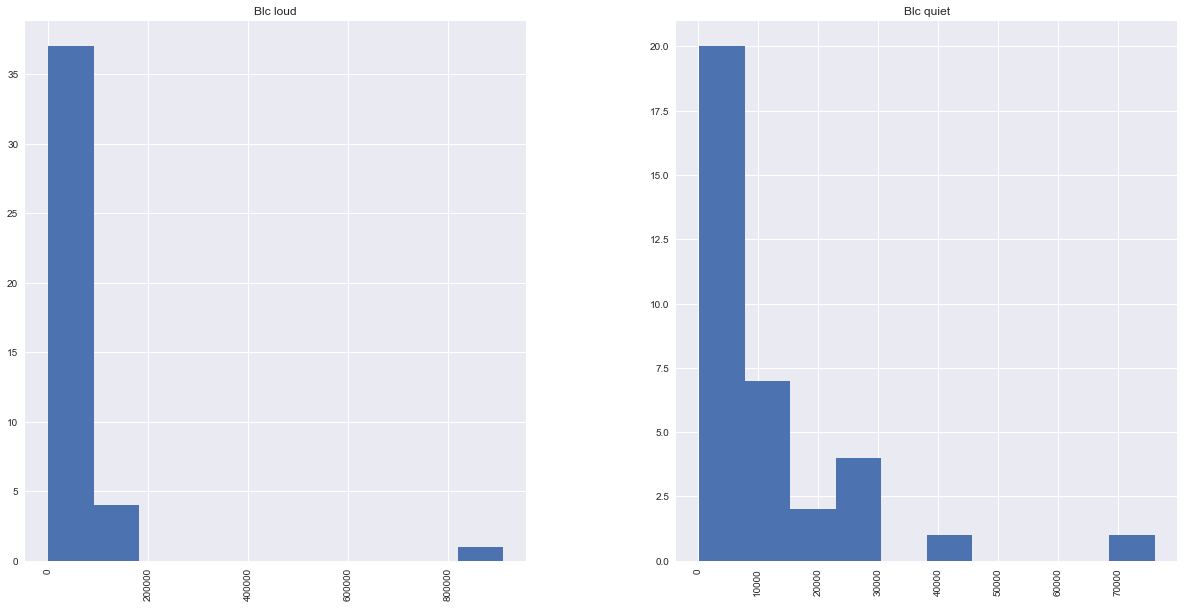

In [22]:
Blc_quiet = np.array(map(float, qR[4]))
Blc_loud = np.array(map(float, lR[4]))

y1 = Blc_quiet
y2 = Blc_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Blc quiet']*len(Blc_quiet), ['Blc loud']*len(Blc_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [23]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [25]:
with model:
    trace = pm.sample(200000, tune=30000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 230000/230000 [05:41<00:00, 672.77it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1269c1ed0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11bc113d0>], dtype=object)

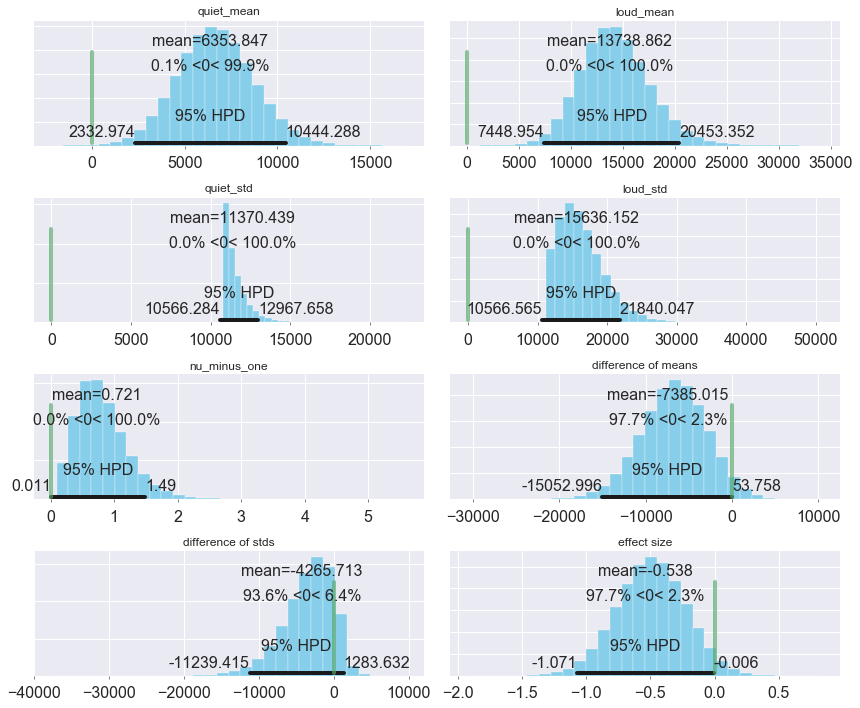

In [26]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x124d6bc90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117180f90>], dtype=object)

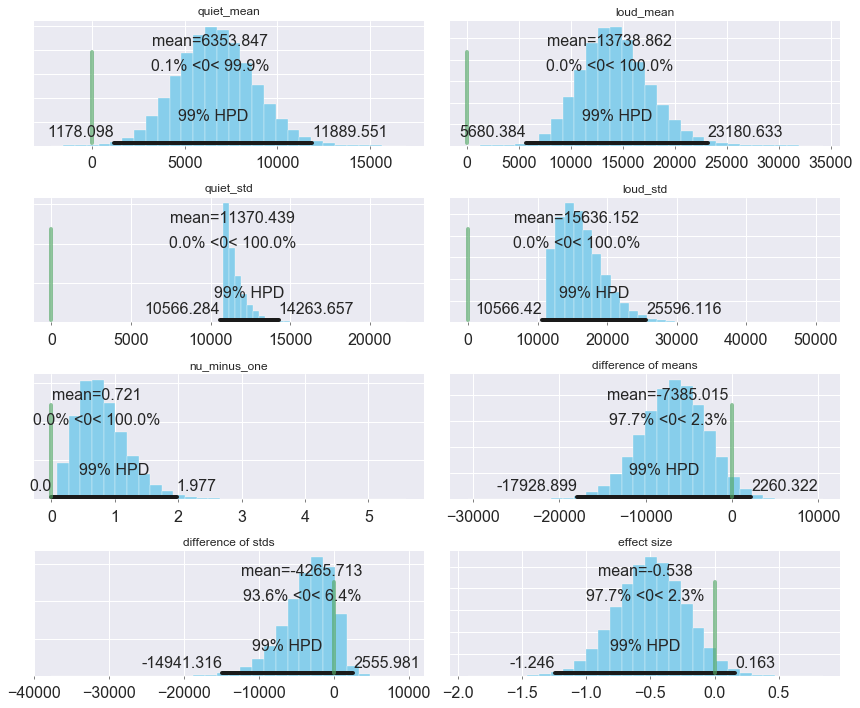

In [27]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Edot

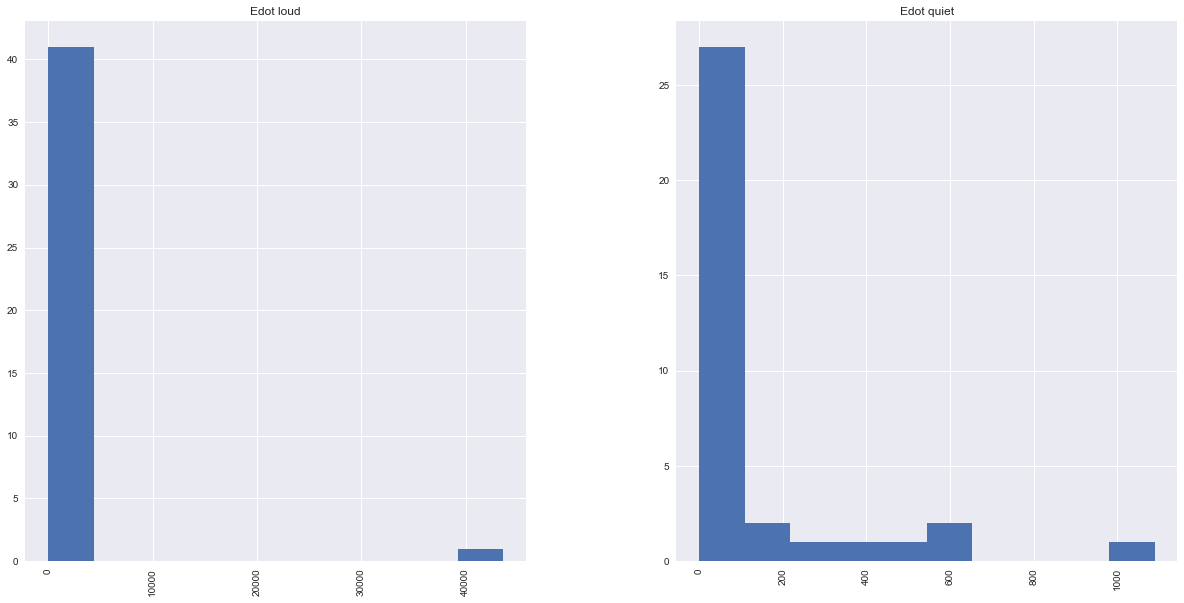

In [28]:
Edot_quiet = np.array(map(float, qR[5]))
Edot_loud = np.array(map(float, lR[5]))

y1 = Edot_quiet
y2 = Edot_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Edot quiet']*len(Edot_quiet), ['Edot loud']*len(Edot_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [29]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [30]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:08<00:00, 713.13it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1271f8d90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11dda0e50>], dtype=object)

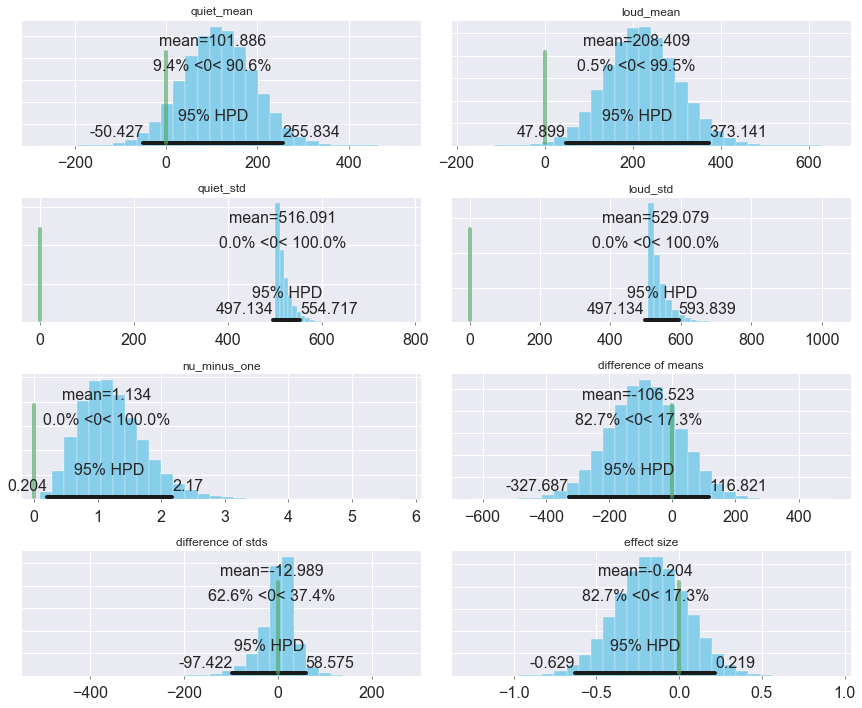

In [31]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11de88510>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11e82bb90>], dtype=object)

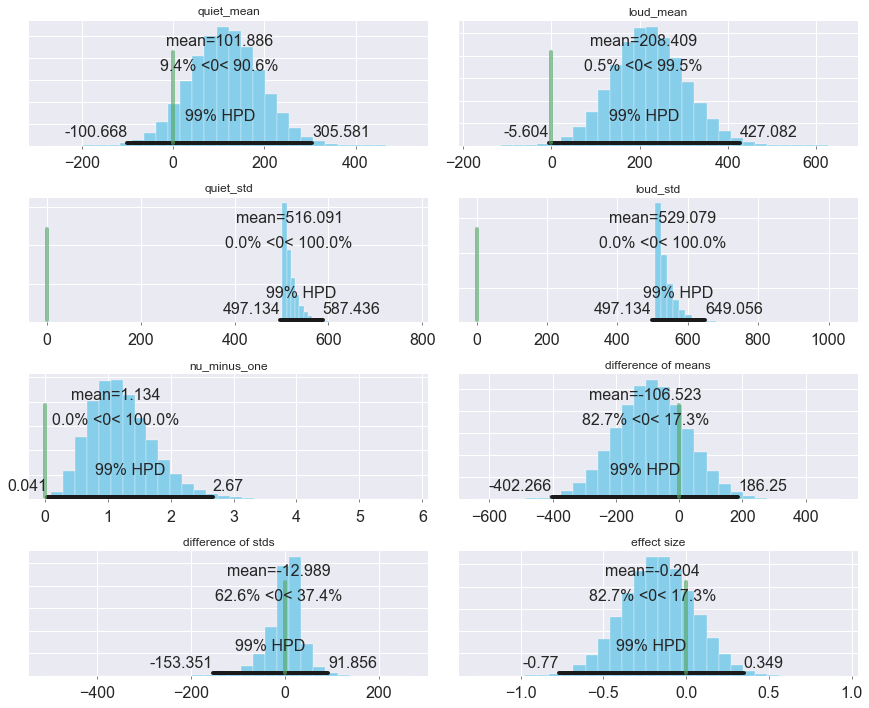

In [32]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Variability Index

In [36]:
tmp = []
for i in lR[6]:
    if i[0]!='>' and i!='middot':
        tmp.append(i)
print tmp

['37.4', '66.6', '621.9', '42.5', '45.3', '32.6', '58.3', '20.0', '47.3', '46.6', '63.7', '71.1', '56.6', '34.9', '56.1', '73.5', '62.7', '36.0', '54.6', '35.4', '56.7', '52.7', '60.2', '36.3', '54.1', '68.9', '48.8', '60.1', '56.0', '49.1', '46.8', '31.1', '38.3', '50.6', '45.3', '52.8']


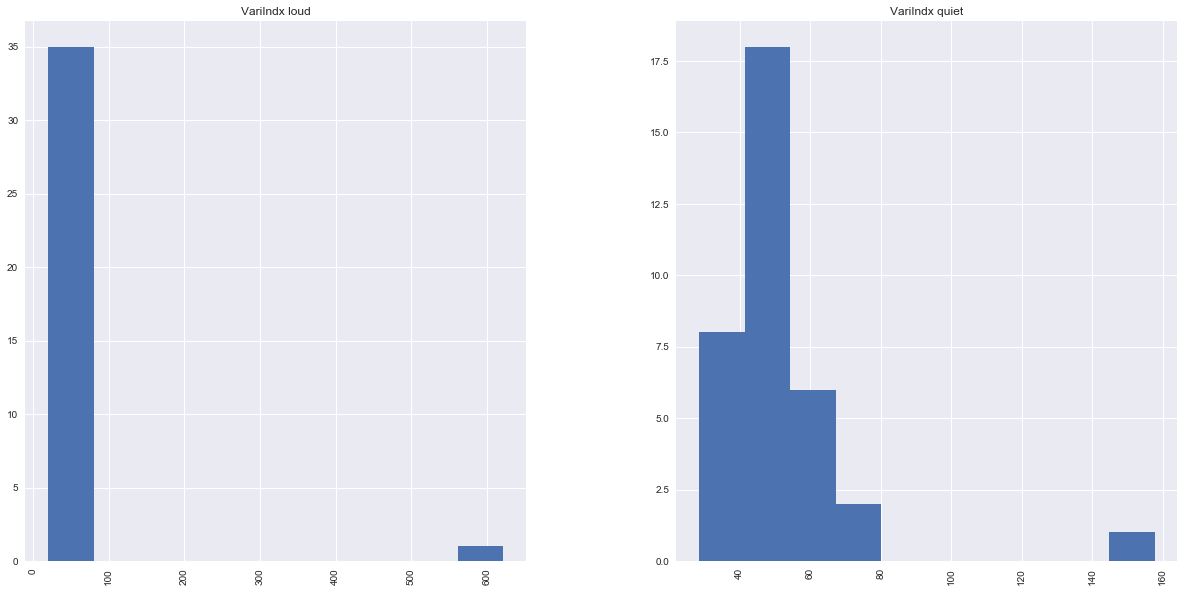

In [37]:
VariIndx_quiet = np.array(map(float, qR[6]))
VariIndx_loud = np.array(map(float, tmp))

y1 = VariIndx_quiet
y2 = VariIndx_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['VariIndx quiet']*len(VariIndx_quiet), ['VariIndx loud']*len(VariIndx_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [38]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [43]:
with model:
    trace = pm.sample(200000, tune=50000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 250000/250000 [06:00<00:00, 694.15it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1245f4690>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x123b77f90>], dtype=object)

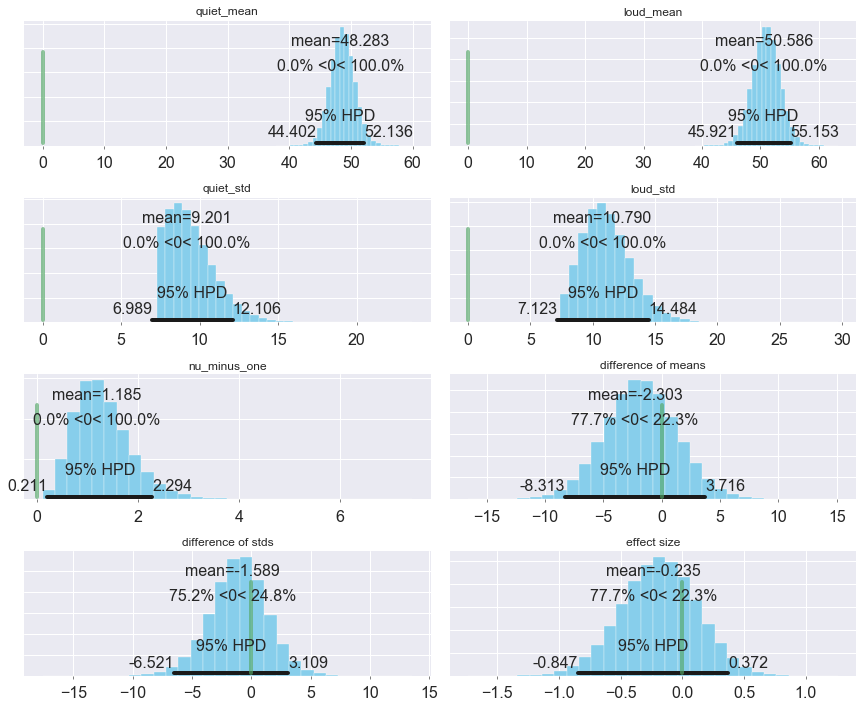

In [44]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x122eb3e10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12522b810>], dtype=object)

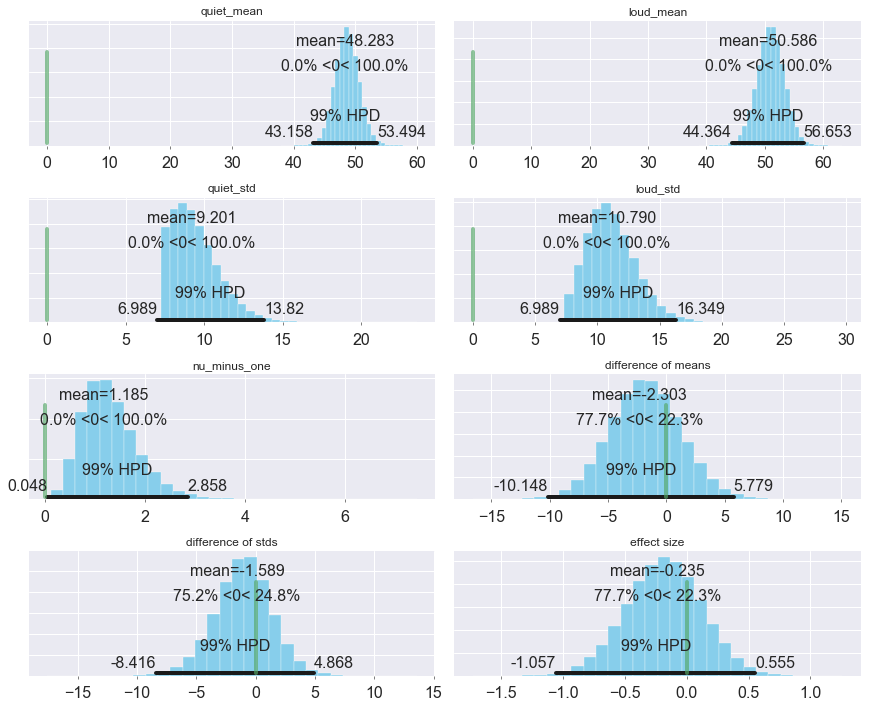

In [45]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Curve Significance

In [53]:
tmp = []
for i in lR[7]:
    if i[0]!='>' and i!='middot':
        tmp.append(i)
print tmp

['4.9', '7.1', '15.8', '8.0', '7.3', '1.4', '4.1', '54.0', '1.9', '5.5', '3.1', '21.3', '18.1', '58.7', '1.8', '5.2', '2.3', '8.5', '2.9', '2.8', '4.0', '10.6', '0', '6.2', '28.5', '8.5', '25.1', '11.8', '3.5', '19.3', '35.5', '12.1', '15.5', '5.5', '21.7', '5.3']


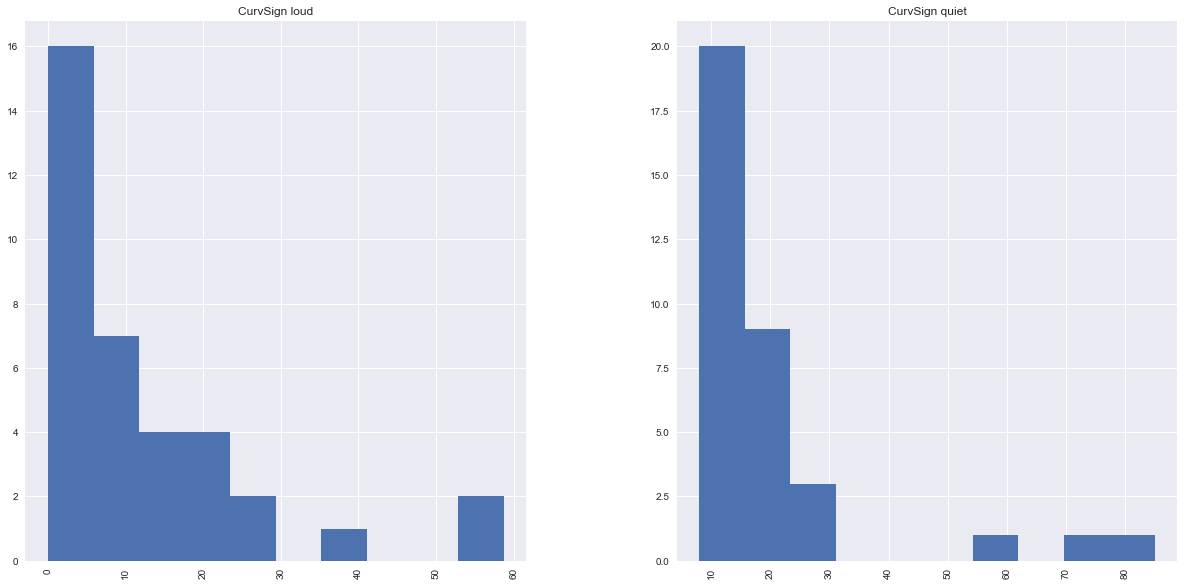

In [54]:
CurvSign_quiet = np.array(map(float, qR[7]))
CurvSign_loud = np.array(map(float, tmp))

y1 = CurvSign_quiet
y2 = CurvSign_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['CurvSign quiet']*len(CurvSign_quiet), ['CurvSign loud']*len(CurvSign_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [55]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [56]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [06:14<00:00, 587.60it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12ab158d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ea2f3d0>], dtype=object)

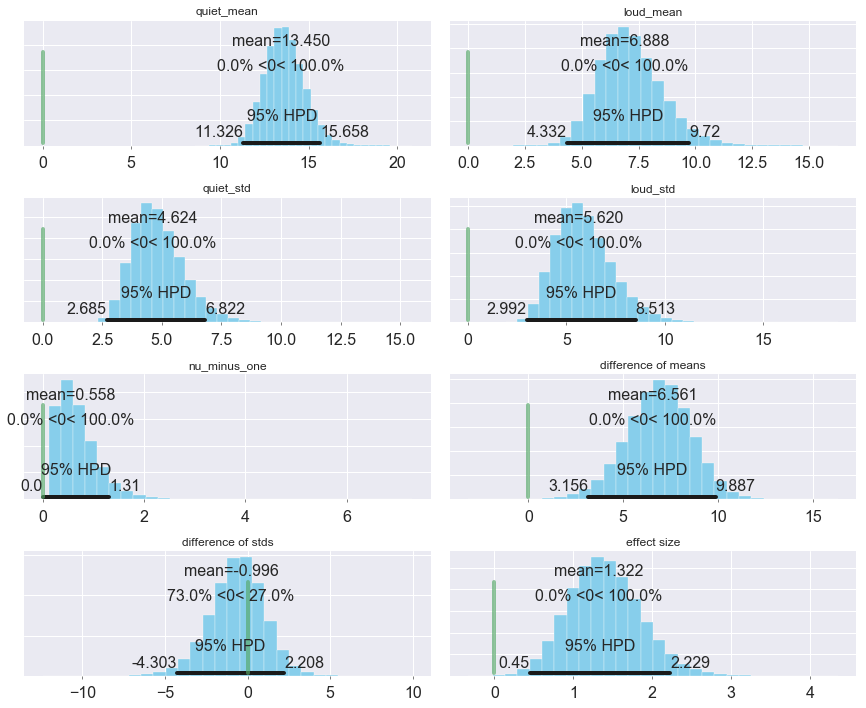

In [57]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117276dd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1234c3650>], dtype=object)

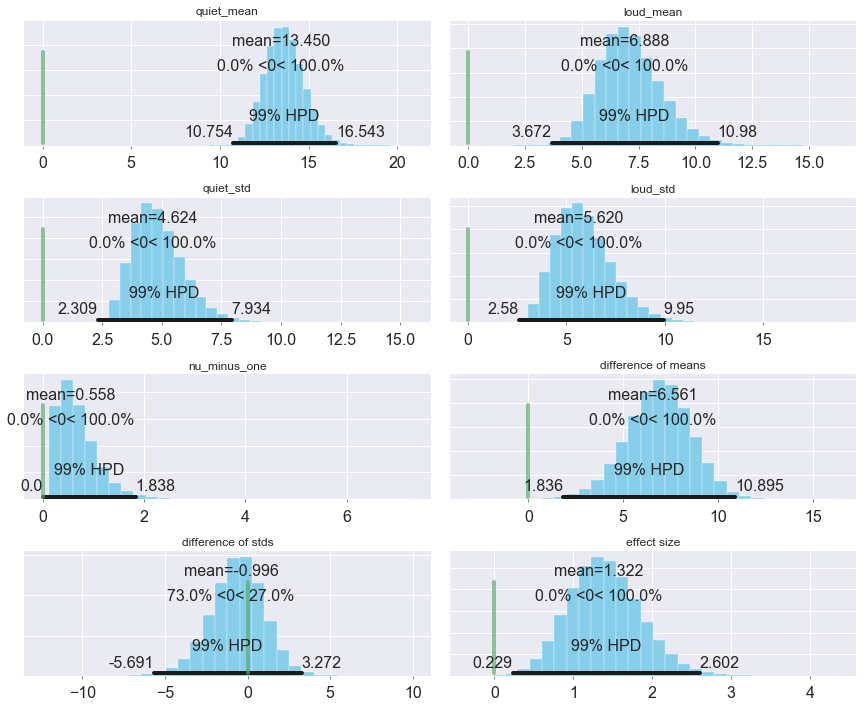

In [58]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Ecut

In [65]:
tmp=[]
for i in qR[8]:
    if i[0]!='>' and i!='middot':
        tmp.append(i[0:3])
print tmp

['4.7', '2.7', '0.8', '0.6', '2.7', '2.2', '3.2', '2.5', '2.8', '2.4', '4.1', '5.5', '2.2', '2.9', '2.5', '1.9', '1.5', '3.6', '3.4', '2.6', '2.2', '2.0', '4.1', '2.2', '2.9', '3.3', '1.0', '2.0', '2.6', '1.9', '1.7', '1.1', '5.0', '1.3', '2.1']


In [67]:
tmp2=[]
for j in lR[8]:
    if j[0]!='>' and j!='middot':
        tmp2.append(j[0:3])
print tmp2

['1.6', '1.6', '4.2', '6.0', '0.4', '1.6', '3.0', '0.5', '6.0', '4.6', '3.0', '1.4', '1.3', '6.0', '3.2', '2.1', '0.9', '1.6', '4.6', '6.0', '0.8', '4.2', '1.4', '1.2', '0.9', '1.9', '3.0', '0.9', '2.5', '3.0', '1.5', '3.2', '1.2', '4.3', '3.0']


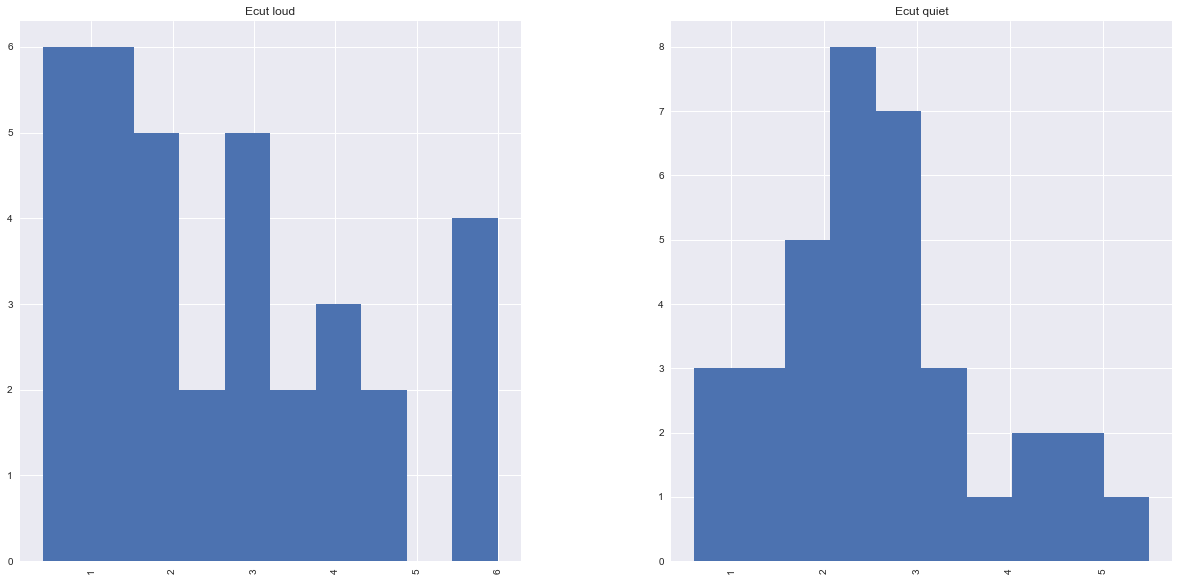

In [69]:
Ecut_quiet = np.array(map(float, tmp))
Ecut_loud = np.array(map(float, tmp2))

y1 = Ecut_quiet
y2 = Ecut_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Ecut quiet']*len(Ecut_quiet), ['Ecut loud']*len(Ecut_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [70]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [73]:
with model:
    trace = pm.sample(200000, tune=50000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 250000/250000 [05:51<00:00, 712.09it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ea72250>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b57bd10>], dtype=object)

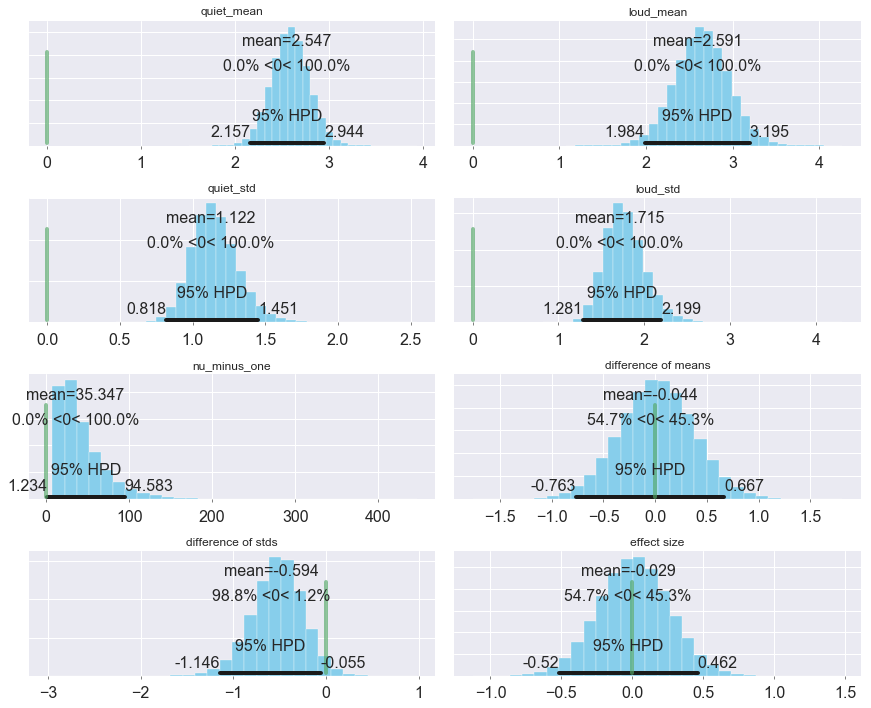

In [74]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12bf86250>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12b581910>], dtype=object)

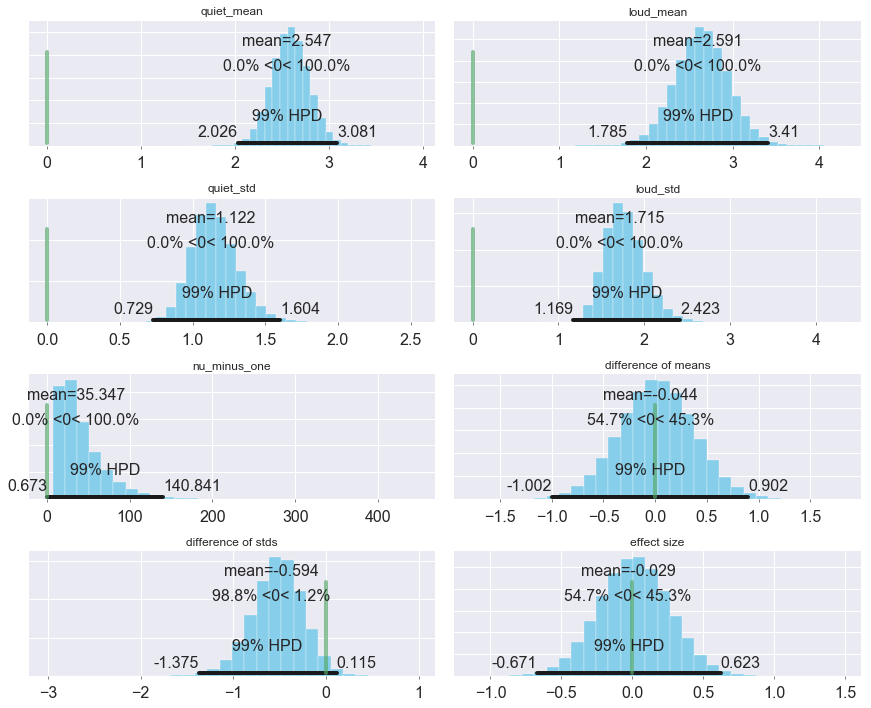

In [75]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Lorentz

In [76]:
tmp=[]
for i in qR[9]:
    if i[0]!='>' and i!='middot':
        tmp.append(i[0:3])
print tmp

['1.4', '1.2', '1.0', '0.6', '1.4', '1.2', '2.0', '1.7', '1.8', '1.7', '1.5', '1.8', '1.6', '2.0', '1.3', '1.0', '1.4', '1.6', '1.6', '1.9', '1.6', '1.2', '1.6', '0.7', '1.6', '1.6', '1.3', '1.4', '1.6', '1.2', '1.6', '1.0', '1.7', '1.3', '1.6']


In [77]:
tmp2=[]
for j in lR[9]:
    if j[0]!='>' and j!='middot':
        tmp2.append(j[0:3])
print tmp2

['1.8', '1.8', '1.9', '1.8', '1.7', '1.7', '1.5', '1.0', '1.8', '1.7', '1.6', '1.0', '1.5', '1.6', '1.8', '1.8', '1.8', '1.5', '1.9', '1.6', '1.1', '1.6', '1.5', '1.5', '1.1', '1.6', '1.5', '0.9', '1.5', '1.7', '0.7', '1.1', '1.4', '1.8', '1.5']


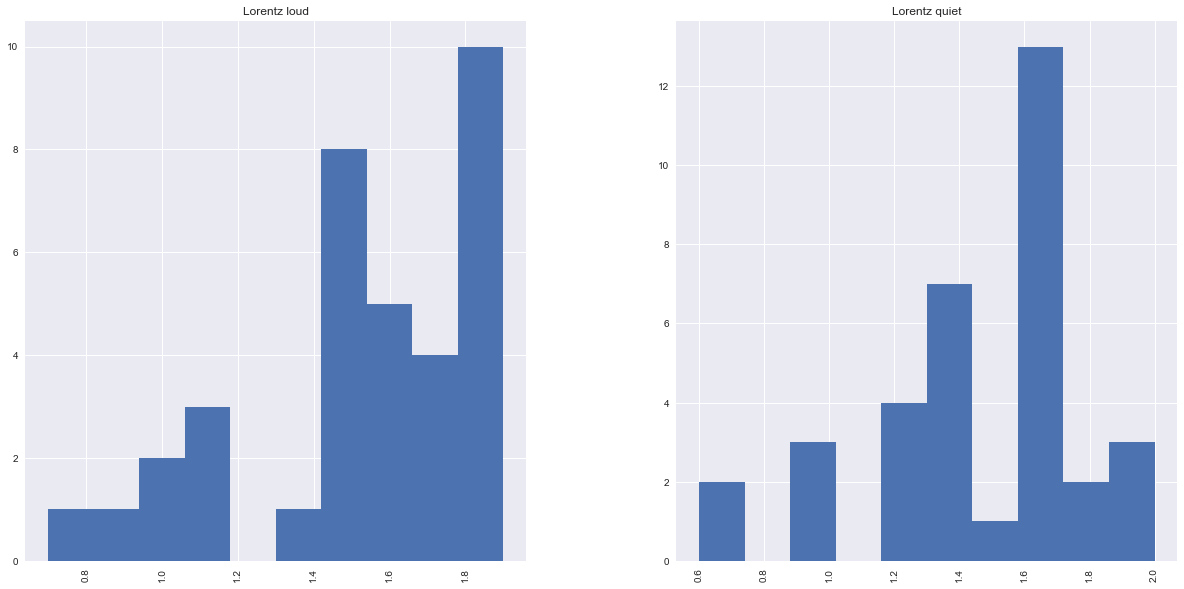

In [78]:
Lorentz_quiet = np.array(map(float, tmp))
Lorentz_loud = np.array(map(float, tmp2))

y1 = Lorentz_quiet
y2 = Lorentz_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Lorentz quiet']*len(Lorentz_quiet), ['Lorentz loud']*len(Lorentz_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [79]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [82]:
with model:
    trace = pm.sample(200000, tune=50000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 250000/250000 [06:05<00:00, 683.91it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x123ae8650>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12be14d50>], dtype=object)

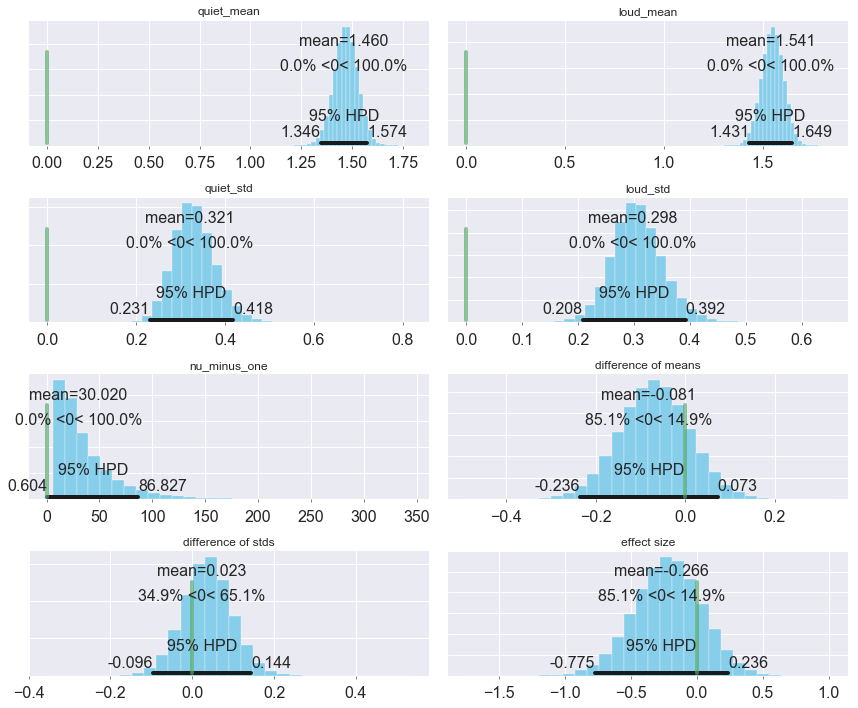

In [83]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x123c4dc10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1222c1fd0>], dtype=object)

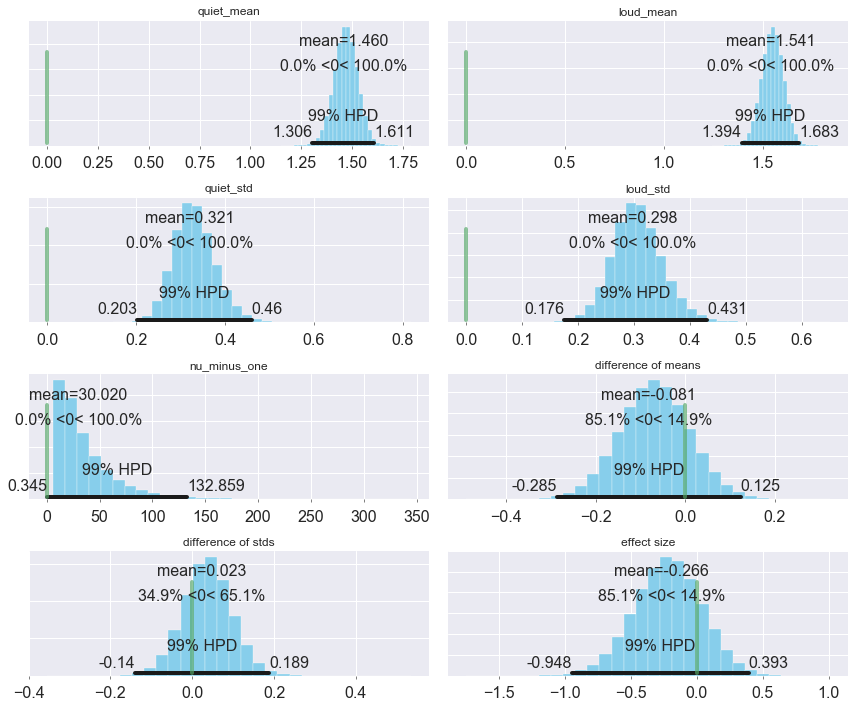

In [84]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# FgOverFx

In [85]:
for i in qR[10]:
    if i[0]!='>' and i!='middot':
        a = 0
        tmp=[]
        while i[a]!='+' and i[a]!='-':
            tmp.append(i[a])
            a+=1
        print ''.join(map(str, tmp)),

4320 1000 1510 8520 2070 1700 1290 1120 8400 1520 5260 3590 1840 3420 19500 2130 4410 667 64600 1240


In [89]:
FgOverFx_quiet = np.array([4320,1000,1510,8520,2070,1700,1290,1120,8400,1520,5260,
                           3590,1840,3420,19500,2130,4410,667,64600,1240])

In [91]:
for i in lR[10]:
    if i[0]!='>' and i!='middot':
        a = 0
        tmp=[]
        while i[a]!='+' and i[a]!='-':
            tmp.append(i[a])
            a+=1
        print ''.join(map(str, tmp)),

29.7 0.296 61.8 1410 370 5390 4000 1950 1070 483 63.1 809 1060 2380 0.612 3150 3560 753 187 43.3 75.3 8.89 33.9 2300 5110 453 49.4


In [92]:
FgOverFx_loud = np.array([29.7,0.296,61.8,1410,370,5390,4000,1950,1070,483,63.1,809,
                          1060,2380,0.612,3150,3560,753,187,43.3,75.3,8.89,33.9,2300,5110,453,49.4])

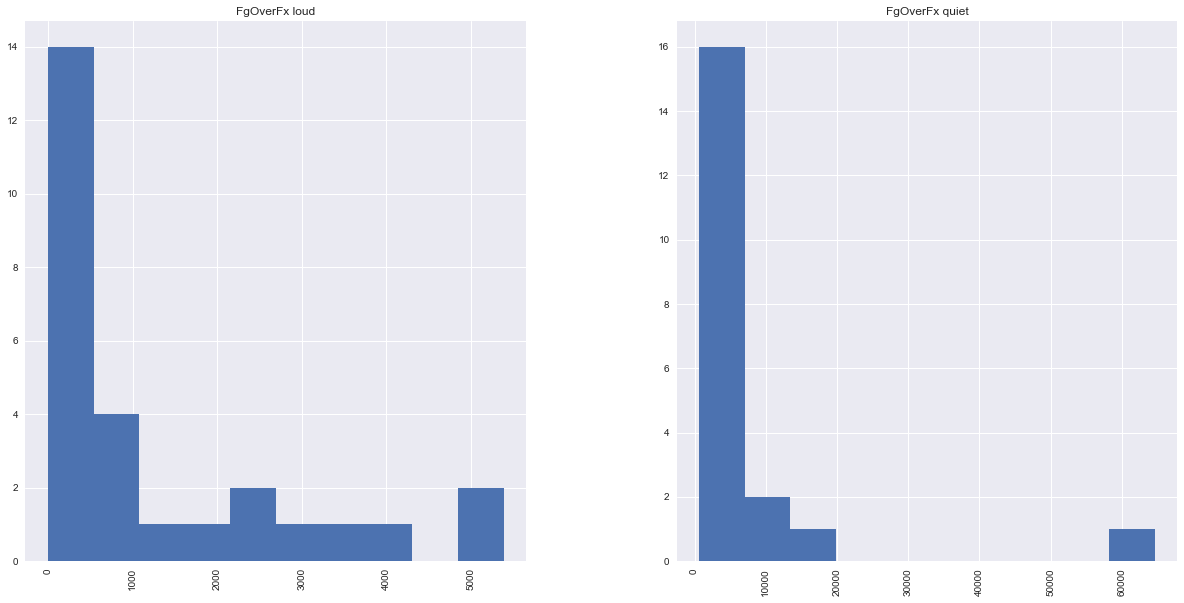

In [93]:
y1 = FgOverFx_quiet
y2 = FgOverFx_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['FgOverFx quiet']*len(FgOverFx_quiet), ['FgOverFx loud']*len(FgOverFx_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [94]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [95]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:25<00:00, 676.00it/s]
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 1 does not match the target. It is 0.899593977023, but should be close to 0.8. Try to increase the number of tuning steps.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1222e7310>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12d1c74d0>], dtype=object)

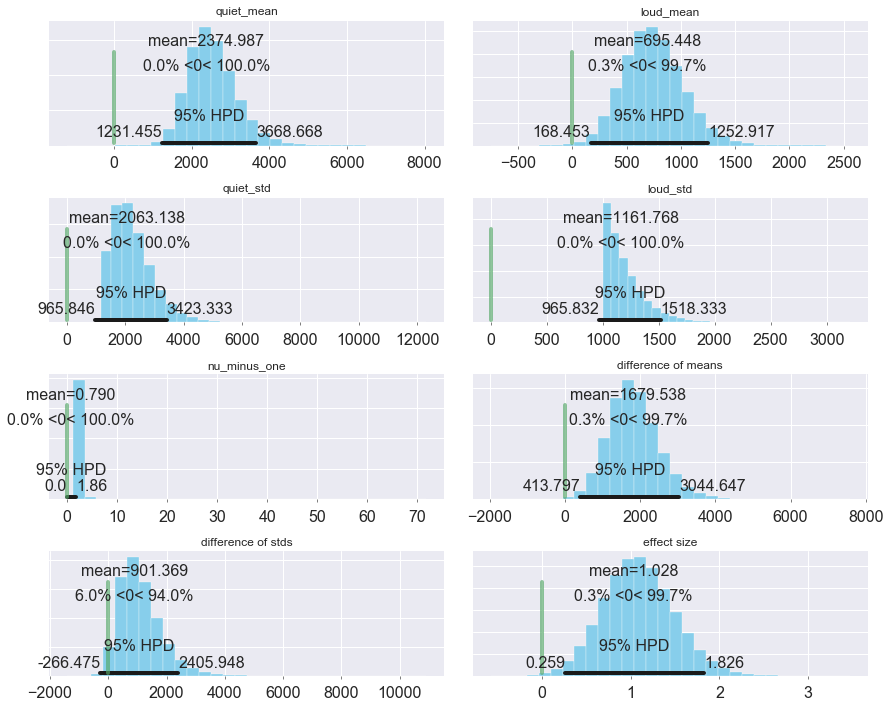

In [96]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12bd08210>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12bc12350>], dtype=object)

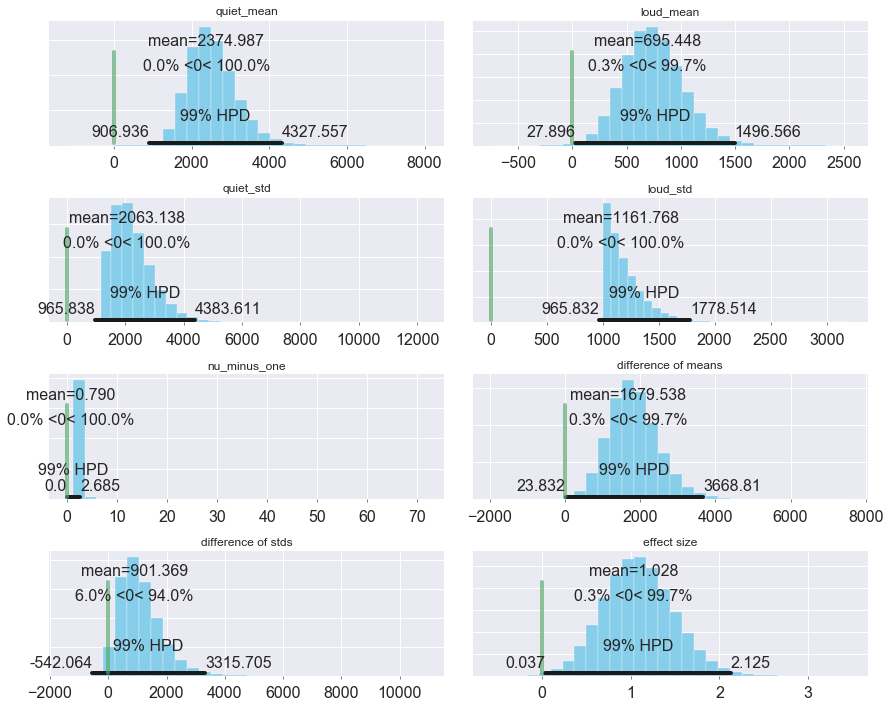

In [97]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# FWHM

In [4]:
for i in qR[11]:
    if i[0]!='>' and i!='middot':
        a = 0
        tmp=[]
        while i[a]!='+' and i[a]!='-':
            tmp.append(i[a])
            a+=1
        print ''.join(map(str, tmp)),

0.216 0.487 0.457 0.476 0.508 0.474 0.373 0.372 0.467 0.479 0.231 0.419 0.176 0.394 0.358 0.489 0.48 0.537 0.298 0.244 0.398 0.456 0.454 0.687 0.451 0.505 0.113 0.337 0.502


In [5]:
for i in qR[12]:
    if i[0]!='>' and i!='middot':
        print i,

0.2123 0.2627 0.3138 0.085 0.2652 0.1434


In [8]:
FWHM_quiet = np.array([0.216,0.487,0.457,0.476,0.508,0.474,0.373,0.372,0.467,0.479,0.231,0.419,0.176,
                       0.394,0.358,0.489,0.48,0.537,0.298,0.244,0.398,0.456,0.454,0.687,0.451,0.505,
                       0.113,0.337,0.502,0.2123,0.2627,0.3138,0.085,0.2652,0.1434])

In [6]:
for i in lR[11]:
    if i[0]!='>' and i!='middot':
        a = 0
        tmp=[]
        while i[a]!='+' and i[a]!='-':
            tmp.append(i[a])
            a+=1
        print ''.join(map(str, tmp)),

0.503 0.407 0.433 0.501 0.423 0.475 0.426 0.307 0.504 0.457 0.204 0.499 0.458 0.312 0.264 0.298 0.244 0.419 0.244 0.392 0.496 0.447 0.421 0.478 0.478 0.309 0.516 0.432 0.299 0.476


In [7]:
for i in lR[12]:
    if i[0]!='>' and i!='middot':
        print i,

0.1968 0.2216 0.1596 0.0423 0.0909 0.1631 0.0521 0.2637 0.1912 0.0607 0.2446 0.1899


In [9]:
FWHM_loud = np.array([0.503,0.407,0.433,0.501,0.423,0.475,0.426,0.307,0.504,0.457,0.204,0.499,0.458,
                      0.312,0.264,0.298,0.244,0.419,0.244,0.392,0.496,0.447,0.421,0.478,0.478,0.309,
                      0.516,0.432,0.299,0.476,0.1968,0.2216,0.1596,0.0423,0.0909,0.1631,0.0521,0.2637,
                      0.1912,0.0607,0.2446,0.1899])

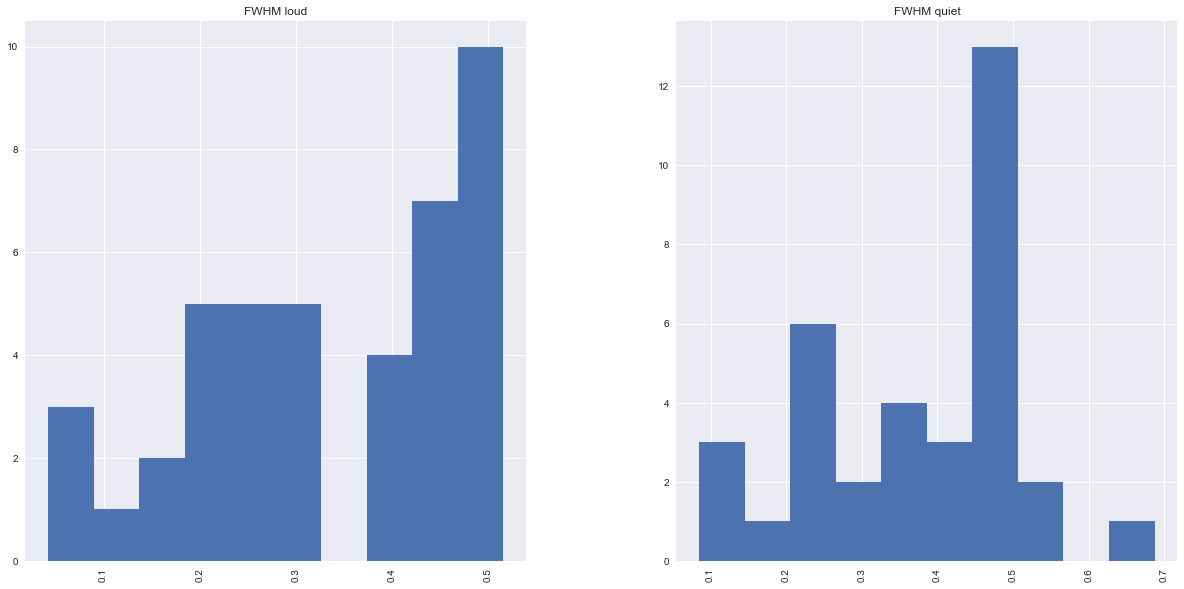

In [10]:
y1 = FWHM_quiet
y2 = FWHM_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['FWHM quiet']*len(FWHM_quiet), ['FWHM loud']*len(FWHM_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [11]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [12]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [03:43<00:00, 984.71it/s]
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 1 contains 2 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x115ac0650>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118229050>], dtype=object)

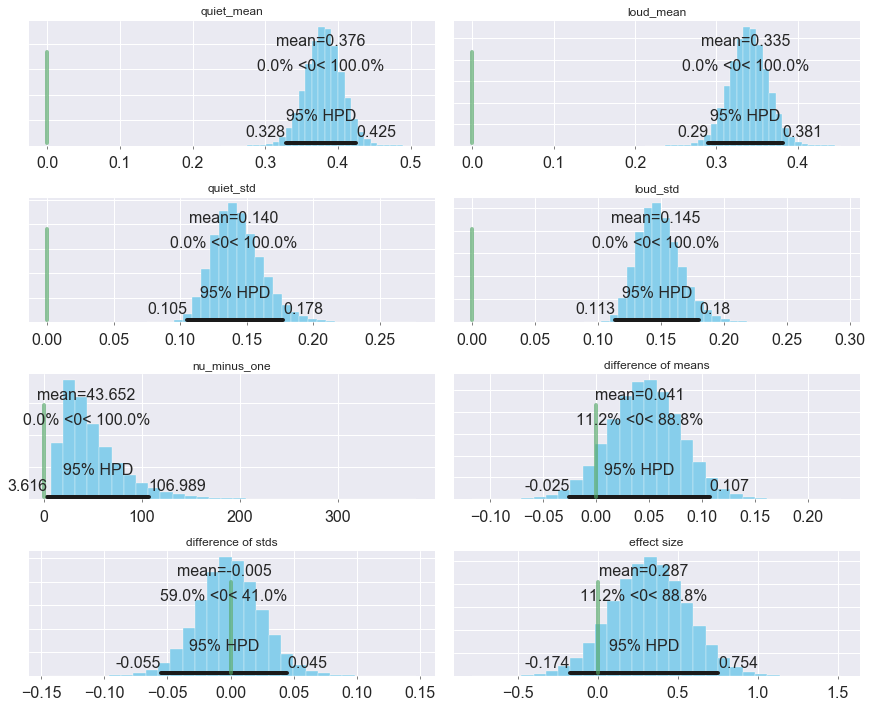

In [13]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113a445d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114099cd0>], dtype=object)

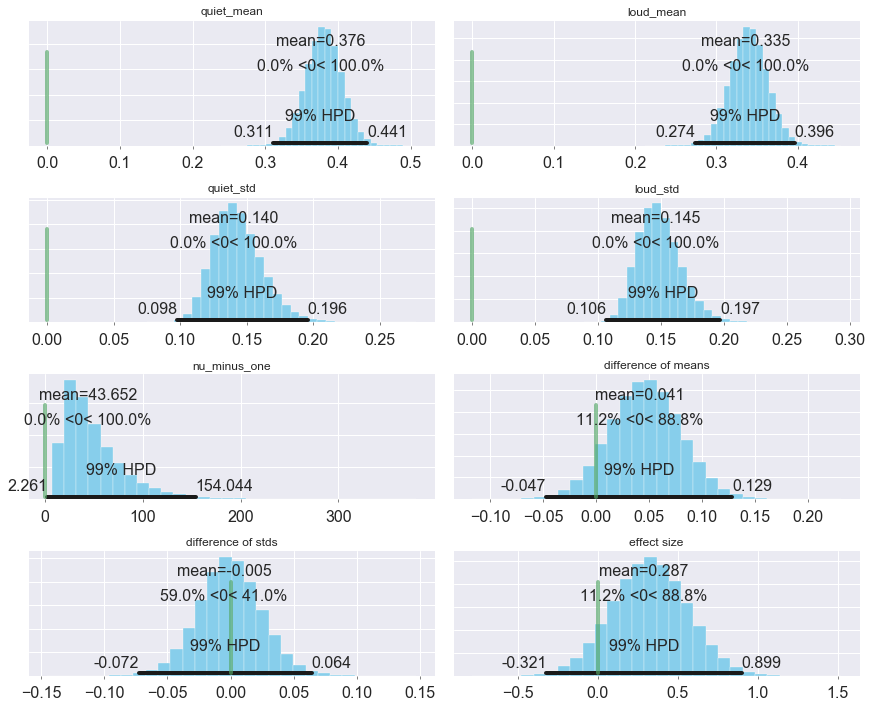

In [14]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log Bs

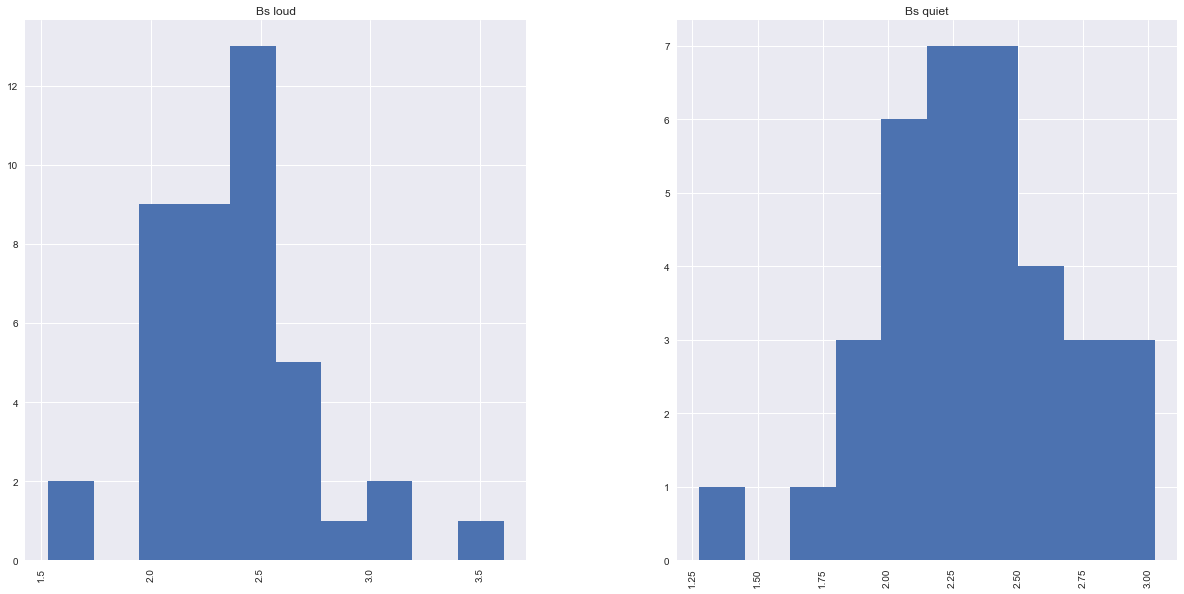

In [7]:
log_Bs_quiet = np.array(map(float, qR[3]))
log_Bs_loud = np.array(map(float, lR[3]))

y1 = np.log10(log_Bs_quiet)
y2 = np.log10(log_Bs_loud)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['log_Bs quiet']*len(log_Bs_quiet), ['log_Bs loud']*len(log_Bs_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [8]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [9]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:24<00:00, 677.30it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x110110050>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x110311bd0>], dtype=object)

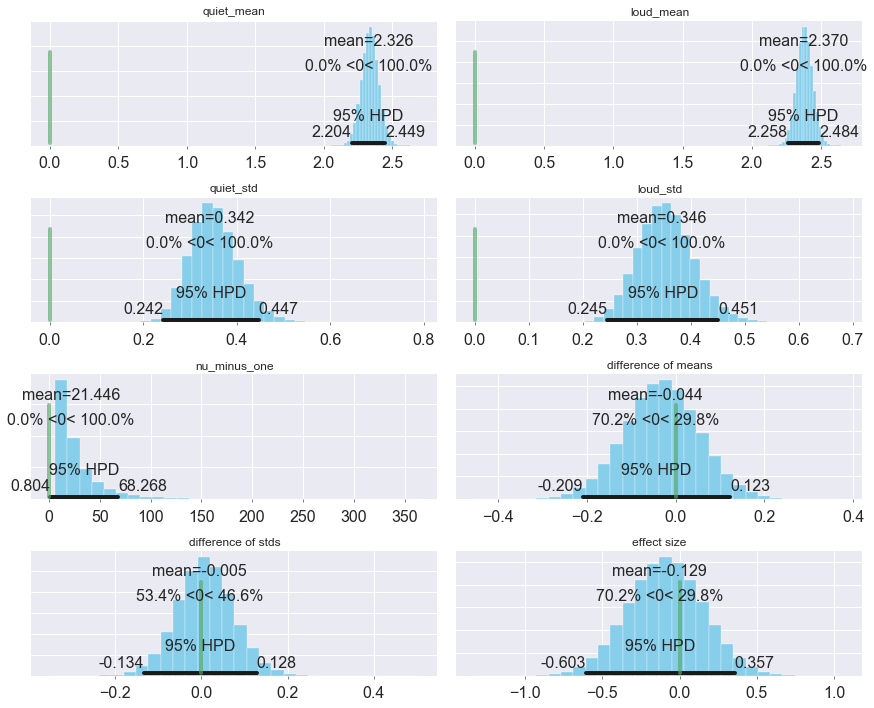

In [10]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1198f3490>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10dfb2c10>], dtype=object)

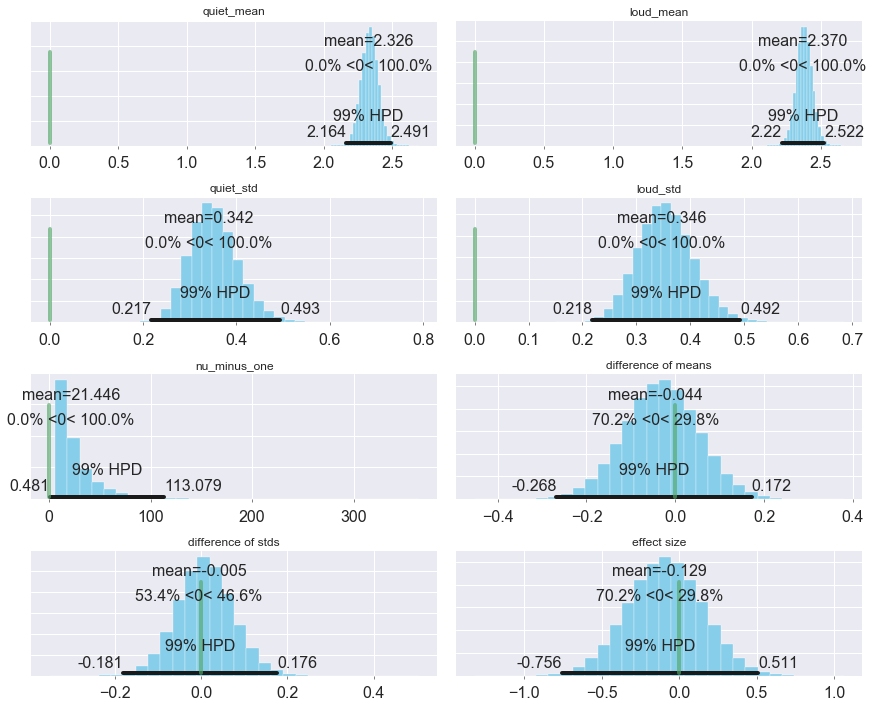

In [11]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log Blc

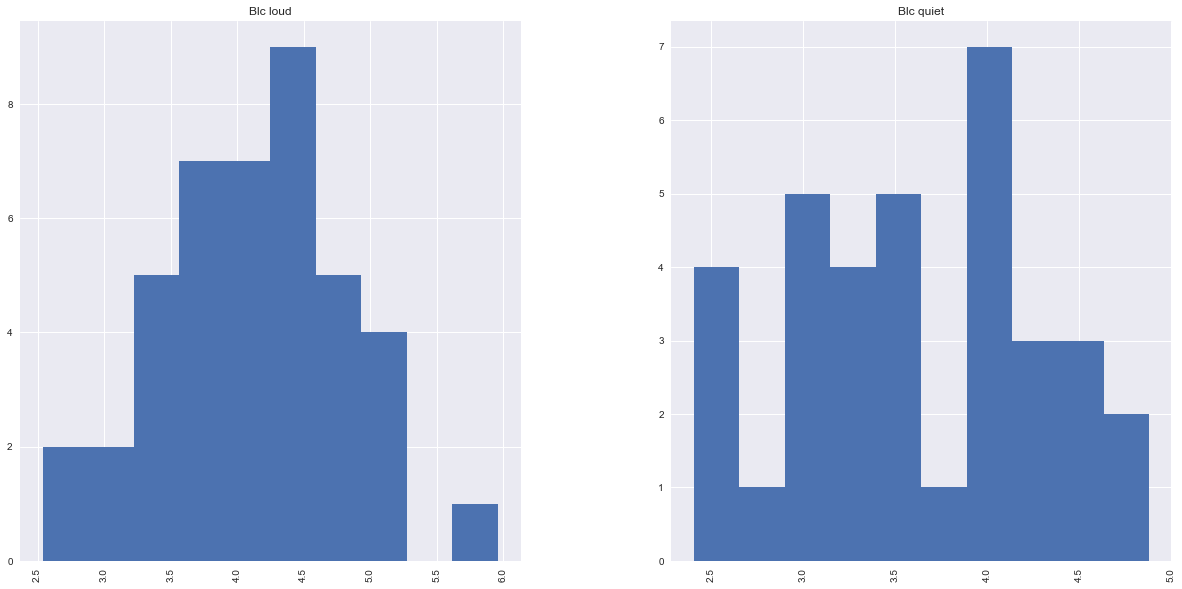

In [12]:
log_Blc_quiet = np.array(map(float, qR[4]))
log_Blc_loud = np.array(map(float, lR[4]))

y1 = np.log10(log_Blc_quiet)
y2 = np.log10(log_Blc_loud)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['log_Blc quiet']*len(log_Blc_quiet), ['log_Blc loud']*len(log_Blc_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [13]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [14]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [04:14<00:00, 864.33it/s]
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 1 contains 3 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11092c910>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10de3de50>], dtype=object)

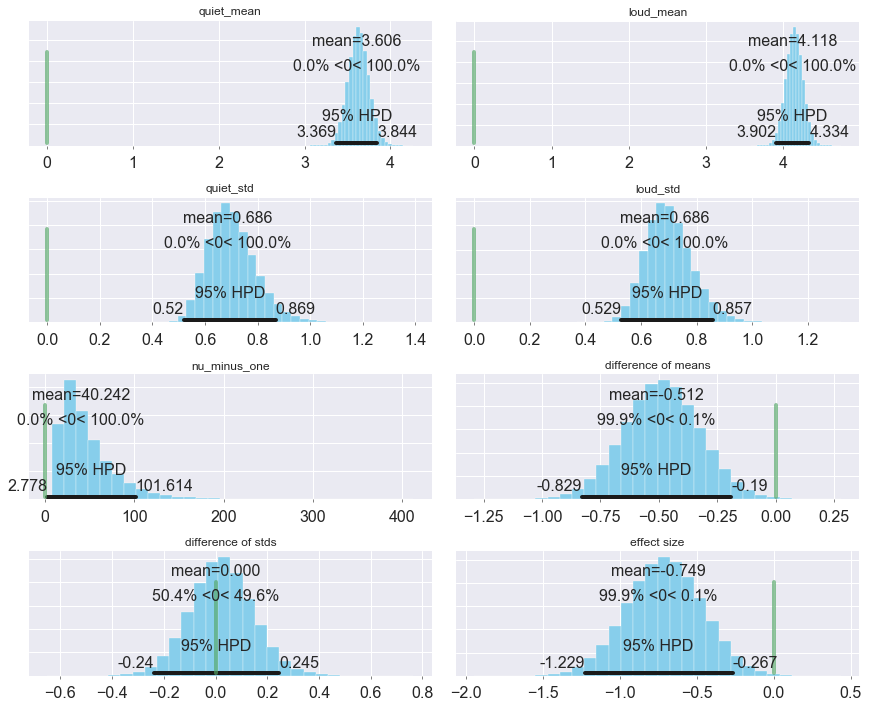

In [15]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1150538d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x113433910>], dtype=object)

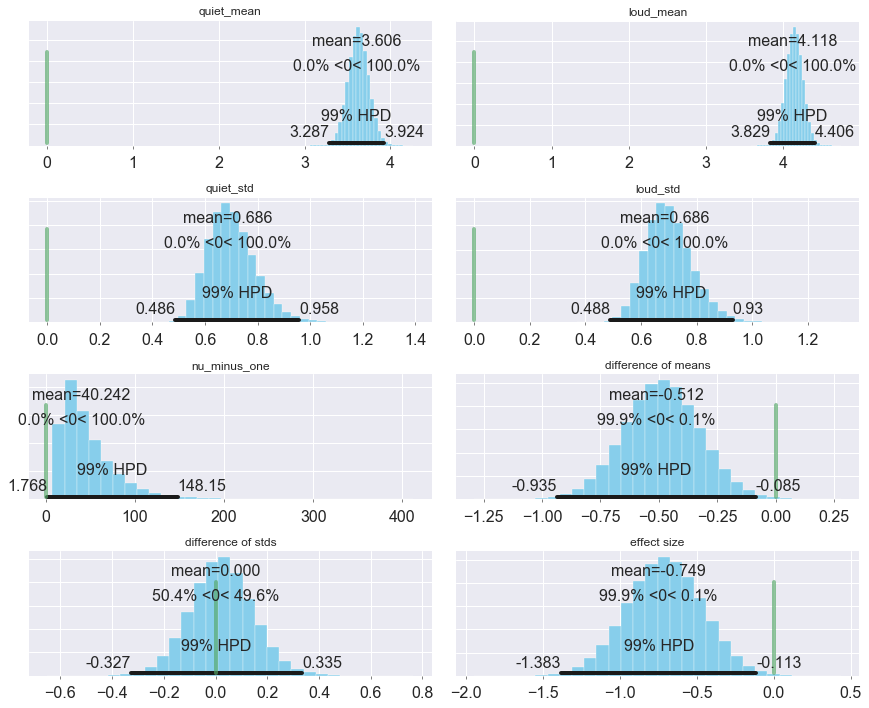

In [16]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log FgOverFx

In [18]:
log_FgOverFx_quiet = np.log10(np.array([4320,1000,1510,8520,2070,1700,1290,1120,8400,1520,5260,
                           3590,1840,3420,19500,2130,4410,667,64600,1240]))

In [20]:
log_FgOverFx_loud = np.log10(np.array([29.7,0.296,61.8,1410,370,5390,4000,1950,1070,483,63.1,809,
                          1060,2380,0.612,3150,3560,753,187,43.3,75.3,8.89,33.9,2300,5110,453,49.4]))

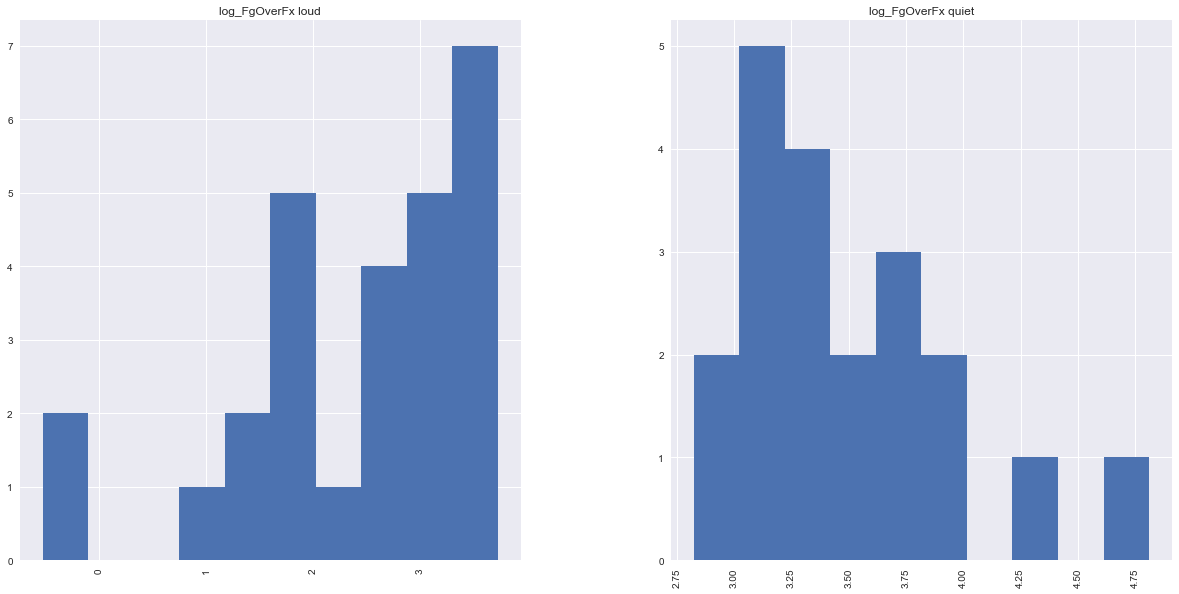

In [21]:
y1 = log_FgOverFx_quiet
y2 = log_FgOverFx_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['log_FgOverFx quiet']*len(log_FgOverFx_quiet), ['log_FgOverFx loud']*len(log_FgOverFx_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [22]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [23]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:21<00:00, 683.40it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x113f23910>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1135bc290>], dtype=object)

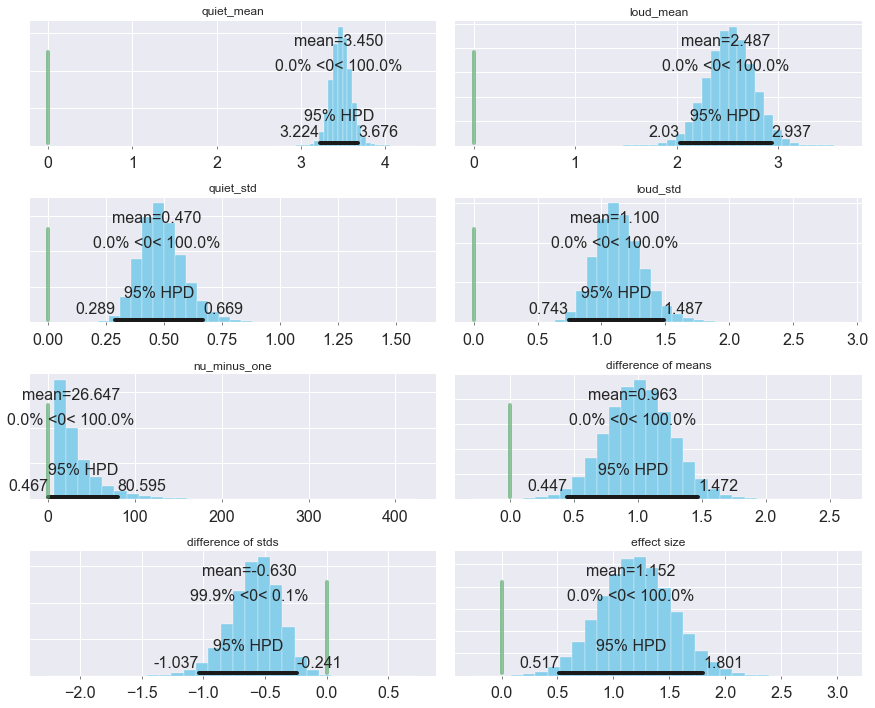

In [24]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113987d10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1104a2450>], dtype=object)

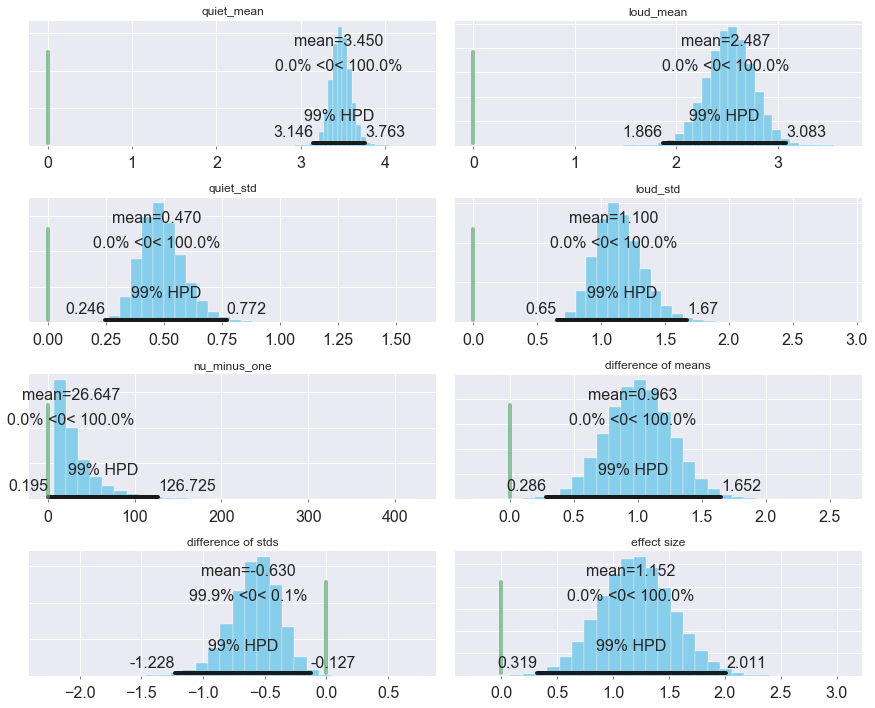

In [25]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log Edot

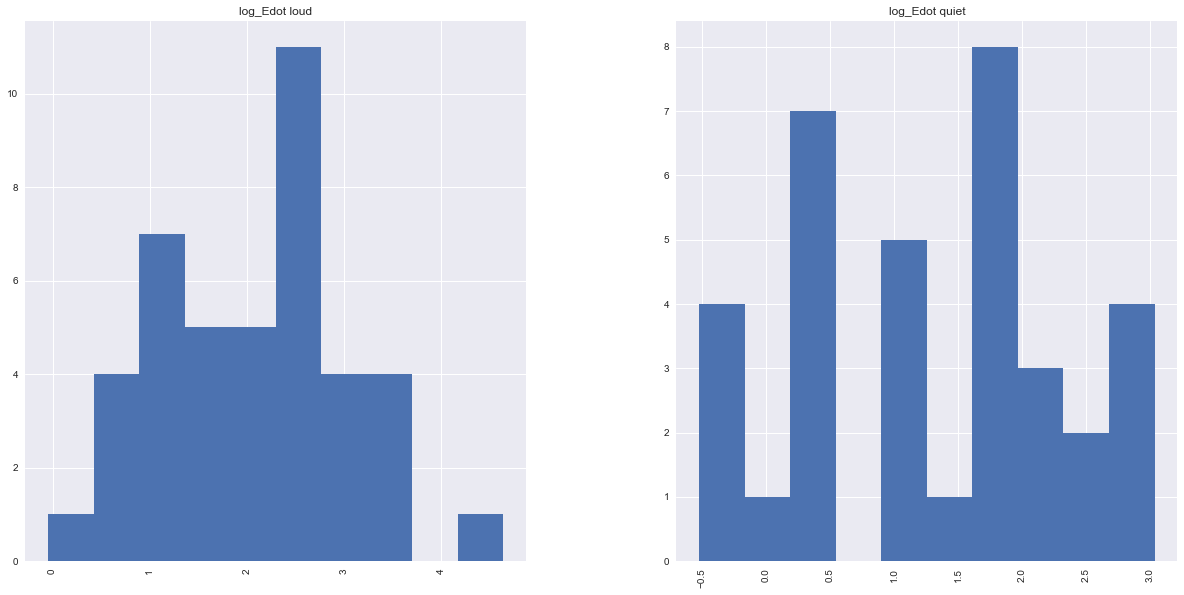

In [35]:
log_Edot_quiet = np.array(map(float, qR[5]))
log_Edot_loud = np.array(map(float, lR[5]))

y1 = np.log10(log_Edot_quiet)
y2 = np.log10(log_Edot_loud)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['log_Edot quiet']*len(log_Edot_quiet), ['log_Edot loud']*len(log_Edot_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [36]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [37]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:09<00:00, 711.42it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11460bad0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1187161d0>], dtype=object)

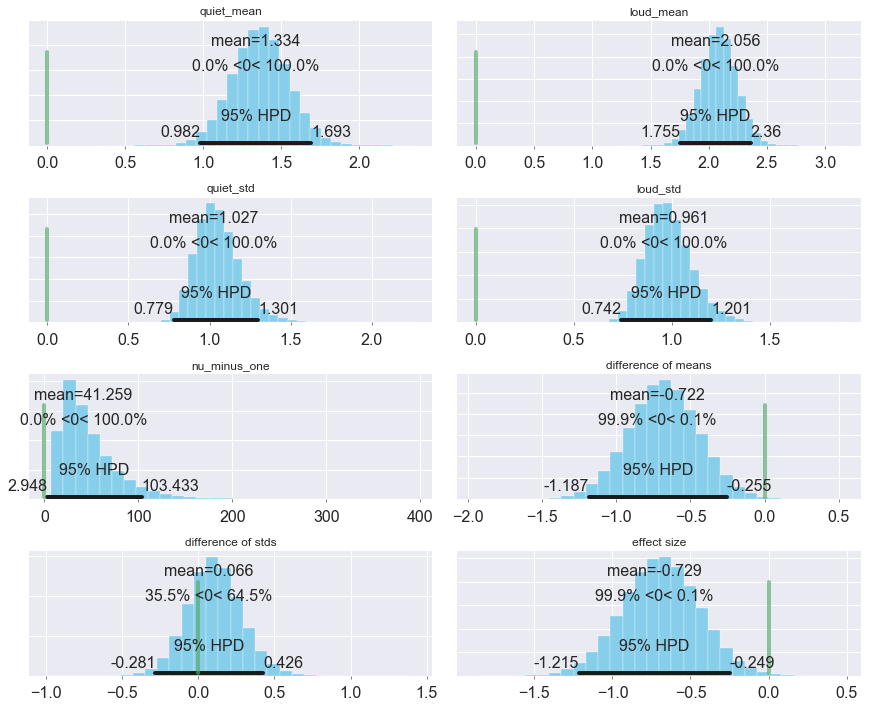

In [38]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119767a10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x111cfdb10>], dtype=object)

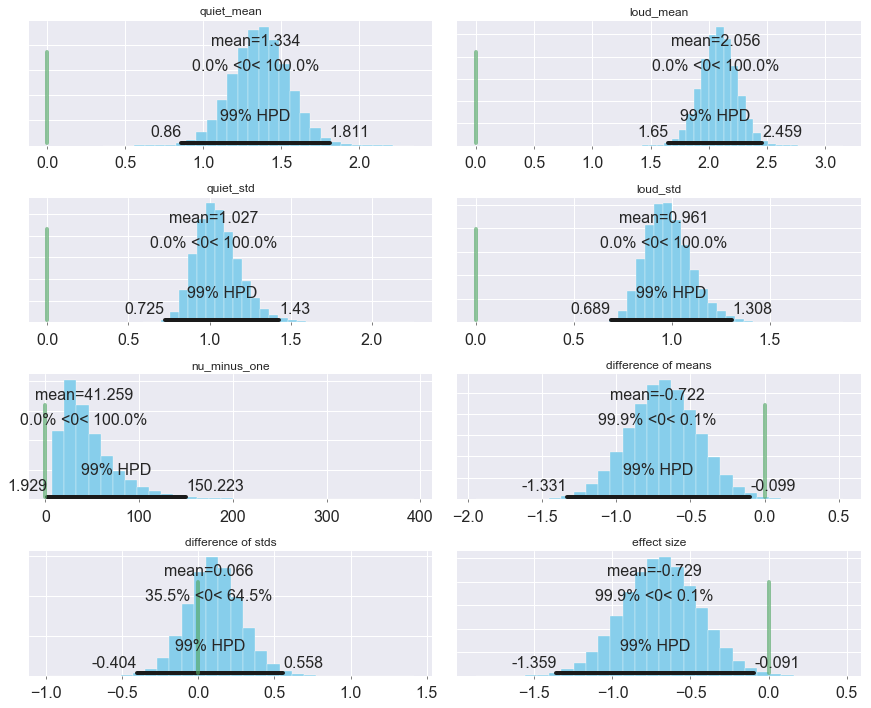

In [39]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

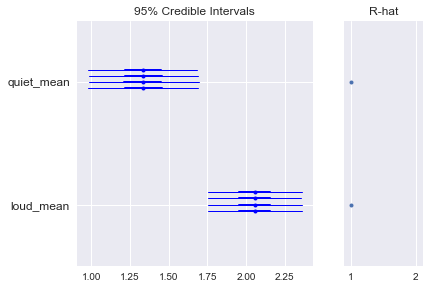

In [40]:
pm.forestplot(trace, varnames=['quiet_mean',
                               'loud_mean']);


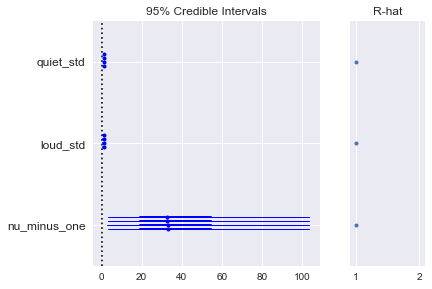

In [41]:
pm.forestplot(trace, varnames=['quiet_std',
                               'loud_std',
                               'nu_minus_one']);